# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the MLP2023_24_CW1_Spec.pdf (see Learn,  Assignment Submission, Coursework 1). The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
# sys.path.append('/path/to/mlpractical')
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/Users/cristihiropedi/mlp_cw1/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/cristihiropedi/mlp_cw1/data/emnist-valid.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/cristihiropedi/mlp_cw1/data/emnist-test.npz' with keys: inputs, targets)


  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.7s to complete
    error(train)=9.30e-01, acc(train)=7.32e-01, error(valid)=9.51e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.8s to complete
    error(train)=7.21e-01, acc(train)=7.86e-01, error(valid)=7.60e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.6s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.80e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.4s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.2s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.97e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.8s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.81e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.1s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.0s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.0s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.6s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.9s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.3s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.7s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.4s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.4s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.0s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.5s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.6s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.43e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.4s to complete
    error(train)=3.25e-01, acc(train)=8.86e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.8s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.6s to complete
    error(train)=3.23e-01, acc(train)=8.86e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.4s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.53e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.4s to complete
    error(train)=3.07e-01, acc(train)=8.92e-01, error(valid)=5.61e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.5s to complete
    error(train)=2.98e-01, acc(train)=8.96e-01, error(valid)=5.54e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.8s to complete
    error(train)=3.00e-01, acc(train)=8.95e-01, error(valid)=5.70e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.3s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=5.66e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.3s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=5.74e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.6s to complete
    error(train)=2.85e-01, acc(train)=8.99e-01, error(valid)=5.73e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.4s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=5.77e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=5.87e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.4s to complete
    error(train)=2.76e-01, acc(train)=9.02e-01, error(valid)=5.89e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.6s to complete
    error(train)=2.76e-01, acc(train)=9.01e-01, error(valid)=6.11e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.5s to complete
    error(train)=2.79e-01, acc(train)=8.98e-01, error(valid)=6.13e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.3s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=6.02e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.4s to complete
    error(train)=2.61e-01, acc(train)=9.06e-01, error(valid)=6.11e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.7s to complete
    error(train)=2.56e-01, acc(train)=9.08e-01, error(valid)=6.09e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.5s to complete
    error(train)=2.52e-01, acc(train)=9.08e-01, error(valid)=6.11e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.5s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=6.29e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.4s to complete
    error(train)=2.43e-01, acc(train)=9.12e-01, error(valid)=6.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.4s to complete
    error(train)=2.43e-01, acc(train)=9.12e-01, error(valid)=6.26e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.5s to complete
    error(train)=2.54e-01, acc(train)=9.07e-01, error(valid)=6.42e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.5s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=6.50e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.5s to complete
    error(train)=2.38e-01, acc(train)=9.13e-01, error(valid)=6.41e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.7s to complete
    error(train)=2.48e-01, acc(train)=9.07e-01, error(valid)=6.54e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.8s to complete
    error(train)=2.32e-01, acc(train)=9.16e-01, error(valid)=6.55e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.3s to complete
    error(train)=2.33e-01, acc(train)=9.14e-01, error(valid)=6.63e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.4s to complete
    error(train)=2.22e-01, acc(train)=9.20e-01, error(valid)=6.64e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.8s to complete
    error(train)=2.36e-01, acc(train)=9.13e-01, error(valid)=6.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.5s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.77e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.6s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.79e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.6s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=6.97e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.7s to complete
    error(train)=2.29e-01, acc(train)=9.16e-01, error(valid)=7.08e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.6s to complete
    error(train)=2.16e-01, acc(train)=9.20e-01, error(valid)=7.00e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.7s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=6.98e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.4s to complete
    error(train)=2.17e-01, acc(train)=9.20e-01, error(valid)=7.14e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.5s to complete
    error(train)=2.13e-01, acc(train)=9.20e-01, error(valid)=7.23e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.6s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=7.21e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.8s to complete
    error(train)=2.08e-01, acc(train)=9.23e-01, error(valid)=7.29e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=7.24e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.0s to complete
    error(train)=2.06e-01, acc(train)=9.23e-01, error(valid)=7.40e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.4s to complete
    error(train)=1.96e-01, acc(train)=9.28e-01, error(valid)=7.33e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.8s to complete
    error(train)=1.95e-01, acc(train)=9.29e-01, error(valid)=7.46e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.8s to complete
    error(train)=2.06e-01, acc(train)=9.21e-01, error(valid)=7.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.9s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.59e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.6s to complete
    error(train)=1.96e-01, acc(train)=9.27e-01, error(valid)=7.61e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.4s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.76e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.5s to complete
    error(train)=2.06e-01, acc(train)=9.21e-01, error(valid)=7.95e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=7.80e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.8s to complete
    error(train)=2.03e-01, acc(train)=9.23e-01, error(valid)=7.92e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.4s to complete
    error(train)=1.91e-01, acc(train)=9.28e-01, error(valid)=7.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.3s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=8.01e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=8.08e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=8.12e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.3s to complete
    error(train)=1.78e-01, acc(train)=9.34e-01, error(valid)=8.16e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.4s to complete
    error(train)=1.87e-01, acc(train)=9.27e-01, error(valid)=8.34e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.6s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.31e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.4s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=8.33e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.4s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.43e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.4s to complete
    error(train)=1.78e-01, acc(train)=9.33e-01, error(valid)=8.47e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.6s to complete
    error(train)=1.72e-01, acc(train)=9.36e-01, error(valid)=8.48e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.7s to complete
    error(train)=1.75e-01, acc(train)=9.33e-01, error(valid)=8.55e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.9s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=8.64e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.3s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=8.64e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.3s to complete
    error(train)=1.73e-01, acc(train)=9.33e-01, error(valid)=8.72e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.2s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=8.79e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.2s to complete
    error(train)=1.76e-01, acc(train)=9.33e-01, error(valid)=9.06e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.8s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=9.09e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.6s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=9.13e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.1s to complete
    error(train)=1.63e-01, acc(train)=9.39e-01, error(valid)=9.13e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.3s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=9.10e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.3s to complete
    error(train)=1.57e-01, acc(train)=9.41e-01, error(valid)=9.14e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.6s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=9.26e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.5s to complete
    error(train)=1.63e-01, acc(train)=9.37e-01, error(valid)=9.36e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.0s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=9.45e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.5s to complete
    error(train)=1.57e-01, acc(train)=9.40e-01, error(valid)=9.42e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.4s to complete
    error(train)=1.62e-01, acc(train)=9.38e-01, error(valid)=9.60e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.8s to complete
    error(train)=1.57e-01, acc(train)=9.40e-01, error(valid)=9.61e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.6s to complete
    error(train)=1.54e-01, acc(train)=9.41e-01, error(valid)=9.56e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.5s to complete
    error(train)=1.56e-01, acc(train)=9.40e-01, error(valid)=9.83e-01, acc(valid)=8.03e-01


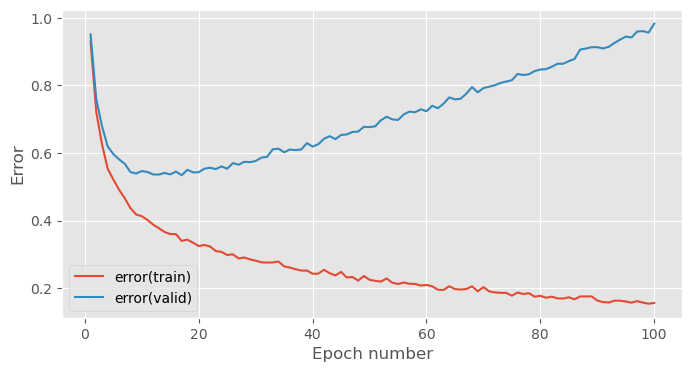

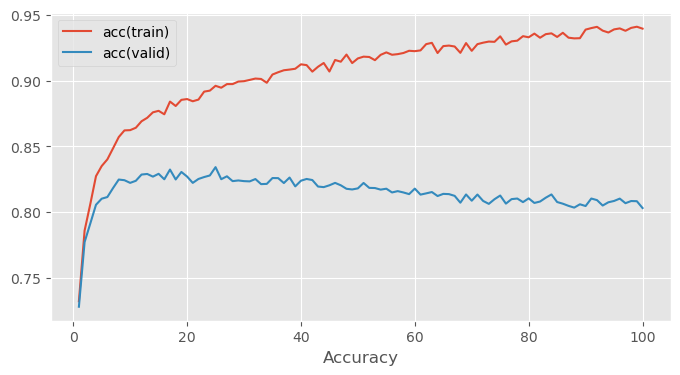

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create model with ONE hidden layer
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.0s to complete
    error(train)=7.38e-01, acc(train)=7.74e-01, error(valid)=7.58e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.9s to complete
    error(train)=5.78e-01, acc(train)=8.13e-01, error(valid)=6.20e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.8s to complete
    error(train)=5.14e-01, acc(train)=8.31e-01, error(valid)=5.73e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.3s to complete
    error(train)=4.65e-01, acc(train)=8.44e-01, error(valid)=5.41e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.7s to complete
    error(train)=4.22e-01, acc(train)=8.57e-01, error(valid)=5.11e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.5s to complete
    error(train)=4.05e-01, acc(train)=8.61e-01, error(valid)=5.08e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.2s to complete
    error(train)=3.79e-01, acc(train)=8.69e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.0s to complete
    error(train)=3.69e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.8s to complete
    error(train)=3.42e-01, acc(train)=8.78e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.9s to complete
    error(train)=3.38e-01, acc(train)=8.78e-01, error(valid)=4.98e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.9s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.4s to complete
    error(train)=3.28e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.8s to complete
    error(train)=3.02e-01, acc(train)=8.89e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.1s to complete
    error(train)=2.84e-01, acc(train)=8.95e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.8s to complete
    error(train)=2.76e-01, acc(train)=8.98e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.2s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.4s to complete
    error(train)=2.55e-01, acc(train)=9.04e-01, error(valid)=5.12e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.0s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.27e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.2s to complete
    error(train)=2.45e-01, acc(train)=9.06e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.8s to complete
    error(train)=2.47e-01, acc(train)=9.04e-01, error(valid)=5.65e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.7s to complete
    error(train)=2.33e-01, acc(train)=9.10e-01, error(valid)=5.60e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.7s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=5.80e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.9s to complete
    error(train)=2.22e-01, acc(train)=9.14e-01, error(valid)=5.74e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.9s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=5.80e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.0s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=5.88e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.9s to complete
    error(train)=2.06e-01, acc(train)=9.20e-01, error(valid)=6.01e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.4s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.37e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.8s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.38e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.8s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=6.52e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.8s to complete
    error(train)=2.02e-01, acc(train)=9.20e-01, error(valid)=6.70e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.8s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=6.83e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.5s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=6.89e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.3s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=6.93e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.9s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=7.22e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.1s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=7.33e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.4s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=7.50e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.1s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=7.53e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.7s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.65e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.7s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.87e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.3s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=7.79e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.0s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=8.09e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.7s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=8.24e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.9s to complete
    error(train)=1.54e-01, acc(train)=9.36e-01, error(valid)=8.34e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.7s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=8.60e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.9s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=8.73e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.7s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=8.79e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.9s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=8.73e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.8s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=9.16e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.8s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.23e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.8s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=9.36e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.9s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=9.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.8s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=9.58e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.1s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=9.91e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.9s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=9.93e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.9s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=9.98e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.9s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.01e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.9s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.03e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.2s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=1.03e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.2s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=1.09e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.9s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=1.09e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.8s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=1.08e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.9s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.11e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.8s to complete
    error(train)=1.19e-01, acc(train)=9.50e-01, error(valid)=1.12e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.8s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.16e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.0s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.13e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.2s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.15e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.3s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.15e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.9s to complete
    error(train)=1.22e-01, acc(train)=9.48e-01, error(valid)=1.17e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.9s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.21e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.2s to complete
    error(train)=1.19e-01, acc(train)=9.50e-01, error(valid)=1.21e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.7s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.24e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.23e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.9s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.24e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.8s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=1.29e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.2s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.24e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.0s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.29e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.8s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.31e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.9s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.30e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.0s to complete
    error(train)=1.13e-01, acc(train)=9.53e-01, error(valid)=1.37e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.8s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.33e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.0s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.39e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.37e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.9s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.36e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.1s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.38e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.7s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.43e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.8s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.45e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.8s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.42e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.8s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.44e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.2s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.46e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.0s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.47e+00, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.2s to complete
    error(train)=1.25e-01, acc(train)=9.50e-01, error(valid)=1.52e+00, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.8s to complete
    error(train)=1.05e-01, acc(train)=9.57e-01, error(valid)=1.49e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.8s to complete
    error(train)=9.77e-02, acc(train)=9.60e-01, error(valid)=1.50e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.8s to complete
    error(train)=9.74e-02, acc(train)=9.60e-01, error(valid)=1.50e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.2s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.56e+00, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.9s to complete
    error(train)=9.28e-02, acc(train)=9.62e-01, error(valid)=1.56e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.8s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.60e+00, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.9s to complete
    error(train)=1.03e-01, acc(train)=9.59e-01, error(valid)=1.59e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.4s to complete
    error(train)=9.18e-02, acc(train)=9.63e-01, error(valid)=1.59e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.9s to complete
    error(train)=9.65e-02, acc(train)=9.61e-01, error(valid)=1.61e+00, acc(valid)=8.14e-01


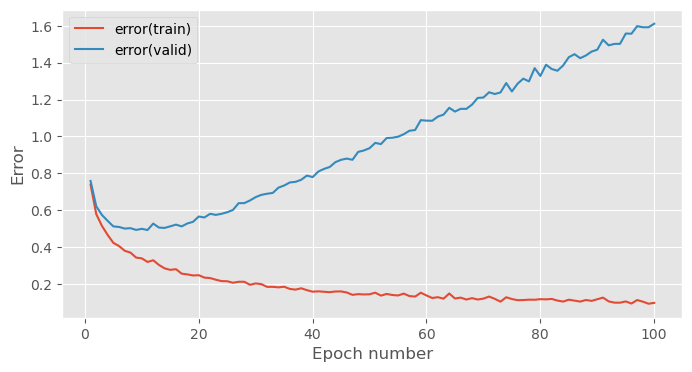

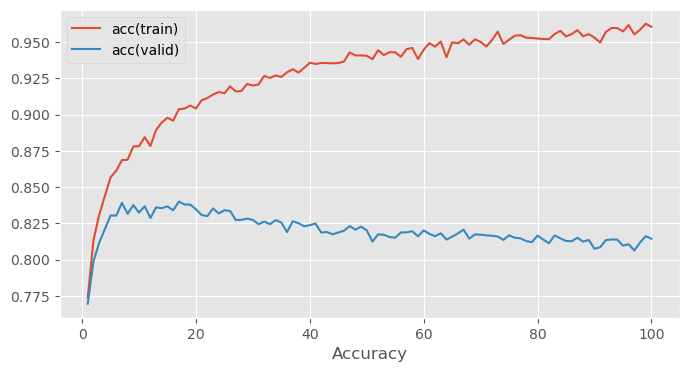

In [4]:
# Create model with TWO hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

# Varying network width

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.6s to complete
    error(train)=1.20e+00, acc(train)=6.64e-01, error(valid)=1.21e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.8s to complete
    error(train)=1.07e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.4s to complete
    error(train)=9.96e-01, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.6s to complete
    error(train)=9.39e-01, acc(train)=7.30e-01, error(valid)=9.61e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.7s to complete
    error(train)=9.03e-01, acc(train)=7.40e-01, error(valid)=9.31e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.5s to complete
    error(train)=8.67e-01, acc(train)=7.49e-01, error(valid)=9.02e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.6s to complete
    error(train)=8.44e-01, acc(train)=7.54e-01, error(valid)=8.81e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.7s to complete
    error(train)=8.25e-01, acc(train)=7.58e-01, error(valid)=8.63e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.6s to complete
    error(train)=8.05e-01, acc(train)=7.63e-01, error(valid)=8.49e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.6s to complete
    error(train)=7.89e-01, acc(train)=7.67e-01, error(valid)=8.36e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.6s to complete
    error(train)=7.72e-01, acc(train)=7.70e-01, error(valid)=8.19e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.6s to complete
    error(train)=7.62e-01, acc(train)=7.74e-01, error(valid)=8.12e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.6s to complete
    error(train)=7.45e-01, acc(train)=7.76e-01, error(valid)=7.97e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.6s to complete
    error(train)=7.28e-01, acc(train)=7.82e-01, error(valid)=7.83e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.2s to complete
    error(train)=7.30e-01, acc(train)=7.80e-01, error(valid)=7.85e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.8s to complete
    error(train)=7.15e-01, acc(train)=7.84e-01, error(valid)=7.72e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.6s to complete
    error(train)=7.09e-01, acc(train)=7.86e-01, error(valid)=7.69e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.2s to complete
    error(train)=6.95e-01, acc(train)=7.88e-01, error(valid)=7.60e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.2s to complete
    error(train)=6.94e-01, acc(train)=7.90e-01, error(valid)=7.60e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.6s to complete
    error(train)=6.92e-01, acc(train)=7.88e-01, error(valid)=7.60e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.5s to complete
    error(train)=6.79e-01, acc(train)=7.94e-01, error(valid)=7.48e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.0s to complete
    error(train)=6.72e-01, acc(train)=7.96e-01, error(valid)=7.44e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.0s to complete
    error(train)=6.69e-01, acc(train)=7.94e-01, error(valid)=7.44e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.5s to complete
    error(train)=6.65e-01, acc(train)=7.96e-01, error(valid)=7.36e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.0s to complete
    error(train)=6.57e-01, acc(train)=7.98e-01, error(valid)=7.32e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.1s to complete
    error(train)=6.57e-01, acc(train)=7.96e-01, error(valid)=7.36e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.9s to complete
    error(train)=6.49e-01, acc(train)=8.01e-01, error(valid)=7.29e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.8s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=7.25e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.8s to complete
    error(train)=6.45e-01, acc(train)=8.00e-01, error(valid)=7.25e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.5s to complete
    error(train)=6.49e-01, acc(train)=8.00e-01, error(valid)=7.30e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.6s to complete
    error(train)=6.44e-01, acc(train)=8.01e-01, error(valid)=7.27e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.4s to complete
    error(train)=6.34e-01, acc(train)=8.03e-01, error(valid)=7.23e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.6s to complete
    error(train)=6.24e-01, acc(train)=8.07e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.3s to complete
    error(train)=6.29e-01, acc(train)=8.04e-01, error(valid)=7.21e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.5s to complete
    error(train)=6.27e-01, acc(train)=8.04e-01, error(valid)=7.18e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.7s to complete
    error(train)=6.23e-01, acc(train)=8.05e-01, error(valid)=7.17e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.7s to complete
    error(train)=6.23e-01, acc(train)=8.06e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.8s to complete
    error(train)=6.13e-01, acc(train)=8.10e-01, error(valid)=7.06e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.2s to complete
    error(train)=6.19e-01, acc(train)=8.08e-01, error(valid)=7.16e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.4s to complete
    error(train)=6.12e-01, acc(train)=8.09e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.8s to complete
    error(train)=6.10e-01, acc(train)=8.09e-01, error(valid)=7.06e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.6s to complete
    error(train)=6.10e-01, acc(train)=8.10e-01, error(valid)=7.09e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.7s to complete
    error(train)=6.10e-01, acc(train)=8.09e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.1s to complete
    error(train)=6.04e-01, acc(train)=8.12e-01, error(valid)=7.06e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.1s to complete
    error(train)=6.04e-01, acc(train)=8.12e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.6s to complete
    error(train)=6.02e-01, acc(train)=8.12e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.4s to complete
    error(train)=6.01e-01, acc(train)=8.12e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.8s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.6s to complete
    error(train)=6.02e-01, acc(train)=8.10e-01, error(valid)=7.10e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.6s to complete
    error(train)=5.90e-01, acc(train)=8.15e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.6s to complete
    error(train)=5.99e-01, acc(train)=8.12e-01, error(valid)=7.07e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.6s to complete
    error(train)=6.02e-01, acc(train)=8.09e-01, error(valid)=7.15e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.8s to complete
    error(train)=5.99e-01, acc(train)=8.13e-01, error(valid)=7.06e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.8s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=7.07e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.8s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=7.00e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.7s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.6s to complete
    error(train)=5.86e-01, acc(train)=8.16e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.5s to complete
    error(train)=5.91e-01, acc(train)=8.12e-01, error(valid)=7.08e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.7s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=7.01e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.6s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=7.05e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.5s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.5s to complete
    error(train)=5.79e-01, acc(train)=8.16e-01, error(valid)=7.01e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.8s to complete
    error(train)=5.82e-01, acc(train)=8.14e-01, error(valid)=7.06e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.6s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=7.05e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.5s to complete
    error(train)=5.78e-01, acc(train)=8.16e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.5s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.8s to complete
    error(train)=5.74e-01, acc(train)=8.19e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.6s to complete
    error(train)=5.82e-01, acc(train)=8.14e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.9s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.7s to complete
    error(train)=5.73e-01, acc(train)=8.17e-01, error(valid)=7.02e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.6s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=7.05e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.7s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=7.01e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.7s to complete
    error(train)=5.72e-01, acc(train)=8.18e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.6s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=7.02e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.5s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.4s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=7.07e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.4s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=7.02e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.5s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=7.07e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.7s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.6s to complete
    error(train)=5.66e-01, acc(train)=8.19e-01, error(valid)=7.04e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.8s to complete
    error(train)=5.68e-01, acc(train)=8.18e-01, error(valid)=7.06e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.7s to complete
    error(train)=5.68e-01, acc(train)=8.18e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.1s to complete
    error(train)=5.62e-01, acc(train)=8.20e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.6s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=7.05e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.8s to complete
    error(train)=5.60e-01, acc(train)=8.23e-01, error(valid)=7.03e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.0s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=7.06e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.4s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=7.19e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.7s to complete
    error(train)=5.63e-01, acc(train)=8.21e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.6s to complete
    error(train)=5.68e-01, acc(train)=8.17e-01, error(valid)=7.15e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.5s to complete
    error(train)=5.64e-01, acc(train)=8.19e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.7s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.9s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.6s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.9s to complete
    error(train)=5.65e-01, acc(train)=8.16e-01, error(valid)=7.16e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.7s to complete
    error(train)=5.60e-01, acc(train)=8.20e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.1s to complete
    error(train)=5.62e-01, acc(train)=8.21e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.5s to complete
    error(train)=5.59e-01, acc(train)=8.21e-01, error(valid)=7.13e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.7s to complete
    error(train)=5.64e-01, acc(train)=8.18e-01, error(valid)=7.18e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.6s to complete
    error(train)=5.58e-01, acc(train)=8.22e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.6s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.2s to complete
    error(train)=8.75e-01, acc(train)=7.46e-01, error(valid)=9.04e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.3s to complete
    error(train)=7.81e-01, acc(train)=7.69e-01, error(valid)=8.17e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.5s to complete
    error(train)=7.14e-01, acc(train)=7.86e-01, error(valid)=7.60e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=6.73e-01, acc(train)=7.94e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.3s to complete
    error(train)=6.31e-01, acc(train)=8.07e-01, error(valid)=6.85e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.3s to complete
    error(train)=6.04e-01, acc(train)=8.13e-01, error(valid)=6.63e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.3s to complete
    error(train)=5.88e-01, acc(train)=8.17e-01, error(valid)=6.54e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.5s to complete
    error(train)=5.77e-01, acc(train)=8.17e-01, error(valid)=6.45e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.3s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=6.31e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.3s to complete
    error(train)=5.41e-01, acc(train)=8.28e-01, error(valid)=6.21e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.3s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=6.18e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.3s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=6.13e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.2s to complete
    error(train)=5.19e-01, acc(train)=8.28e-01, error(valid)=6.18e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.3s to complete
    error(train)=5.00e-01, acc(train)=8.39e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.6s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=6.07e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.4s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=6.04e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.5s to complete
    error(train)=4.82e-01, acc(train)=8.42e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.4s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.3s to complete
    error(train)=4.73e-01, acc(train)=8.44e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.3s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.5s to complete
    error(train)=4.60e-01, acc(train)=8.47e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.5s to complete
    error(train)=4.50e-01, acc(train)=8.51e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.4s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=5.90e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.4s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=5.90e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.3s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.4s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.3s to complete
    error(train)=4.35e-01, acc(train)=8.54e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.2s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=5.93e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.3s to complete
    error(train)=4.29e-01, acc(train)=8.56e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.2s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.4s to complete
    error(train)=4.29e-01, acc(train)=8.55e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.3s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.2s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=5.93e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.9s to complete
    error(train)=4.19e-01, acc(train)=8.58e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.4s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.89e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.4s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=5.91e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.3s to complete
    error(train)=4.08e-01, acc(train)=8.61e-01, error(valid)=5.93e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.5s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.93e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.9s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=5.98e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 11.7s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.3s to complete
    error(train)=3.99e-01, acc(train)=8.63e-01, error(valid)=5.99e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.8s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=5.99e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.0s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.95e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.1s to complete
    error(train)=3.93e-01, acc(train)=8.66e-01, error(valid)=6.01e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.5s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.99e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.2s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=5.99e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.2s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=6.09e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 18.4s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=6.02e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.6s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=6.06e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.3s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=6.01e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.9s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=6.05e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.9s to complete
    error(train)=3.82e-01, acc(train)=8.69e-01, error(valid)=6.09e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.1s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=6.06e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.5s to complete
    error(train)=3.75e-01, acc(train)=8.70e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.5s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=6.23e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.2s to complete
    error(train)=3.78e-01, acc(train)=8.69e-01, error(valid)=6.18e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.0s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=6.13e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.2s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=6.20e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.1s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=6.18e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.8s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=6.20e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.5s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=6.29e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.9s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=6.25e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.6s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=6.33e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.0s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=6.24e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.3s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=6.25e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.6s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=6.32e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.6s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=6.26e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.0s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=6.30e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.0s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=6.25e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.1s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=6.31e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.3s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=6.34e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.5s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=6.36e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.2s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=6.43e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.0s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=6.48e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=6.34e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.0s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=6.38e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.2s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=6.34e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.3s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=6.48e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.1s to complete
    error(train)=3.51e-01, acc(train)=8.77e-01, error(valid)=6.50e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.4s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=6.53e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.4s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=6.54e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.9s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=6.49e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.0s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=6.48e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.0s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=6.51e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.9s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=6.52e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 14.7s to complete
    error(train)=3.43e-01, acc(train)=8.80e-01, error(valid)=6.58e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.4s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=6.66e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.8s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=6.60e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.5s to complete
    error(train)=3.39e-01, acc(train)=8.83e-01, error(valid)=6.55e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.1s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=6.61e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.0s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=6.65e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=6.57e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.1s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=6.71e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=6.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.0s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=6.63e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.0s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=6.72e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.9s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=6.65e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.0s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=6.67e-01, acc(valid)=8.07e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=9.33e-01, acc(train)=7.31e-01, error(valid)=9.50e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.6s to complete
    error(train)=7.22e-01, acc(train)=7.86e-01, error(valid)=7.49e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.7s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=6.91e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.6s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.13e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.8s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.9s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.1s to complete
    error(train)=4.77e-01, acc(train)=8.43e-01, error(valid)=5.64e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.4s to complete
    error(train)=4.51e-01, acc(train)=8.51e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.7s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.3s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.39e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.1s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.7s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.0s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.5s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.4s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.7s to complete
    error(train)=3.57e-01, acc(train)=8.75e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.6s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.6s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.4s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.7s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=5.35e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.5s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.6s to complete
    error(train)=3.20e-01, acc(train)=8.87e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.7s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.48e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.6s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=5.53e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.6s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=5.54e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.8s to complete
    error(train)=2.99e-01, acc(train)=8.93e-01, error(valid)=5.53e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.8s to complete
    error(train)=2.96e-01, acc(train)=8.95e-01, error(valid)=5.59e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.5s to complete
    error(train)=2.88e-01, acc(train)=8.98e-01, error(valid)=5.57e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.8s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=5.62e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.7s to complete
    error(train)=2.85e-01, acc(train)=8.97e-01, error(valid)=5.71e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.6s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=5.74e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.5s to complete
    error(train)=2.68e-01, acc(train)=9.05e-01, error(valid)=5.69e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.6s to complete
    error(train)=2.68e-01, acc(train)=9.05e-01, error(valid)=5.80e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.7s to complete
    error(train)=2.73e-01, acc(train)=9.01e-01, error(valid)=5.90e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.5s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=5.95e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.9s to complete
    error(train)=2.63e-01, acc(train)=9.03e-01, error(valid)=5.98e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.7s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=6.05e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.6s to complete
    error(train)=2.52e-01, acc(train)=9.10e-01, error(valid)=6.03e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.7s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=6.18e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.5s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=6.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.6s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=6.21e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.5s to complete
    error(train)=2.49e-01, acc(train)=9.09e-01, error(valid)=6.37e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.6s to complete
    error(train)=2.37e-01, acc(train)=9.15e-01, error(valid)=6.31e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.6s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=6.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.7s to complete
    error(train)=2.43e-01, acc(train)=9.11e-01, error(valid)=6.49e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.6s to complete
    error(train)=2.40e-01, acc(train)=9.13e-01, error(valid)=6.52e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.6s to complete
    error(train)=2.32e-01, acc(train)=9.17e-01, error(valid)=6.52e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.5s to complete
    error(train)=2.33e-01, acc(train)=9.13e-01, error(valid)=6.61e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.6s to complete
    error(train)=2.29e-01, acc(train)=9.15e-01, error(valid)=6.68e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.7s to complete
    error(train)=2.29e-01, acc(train)=9.16e-01, error(valid)=6.68e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.5s to complete
    error(train)=2.31e-01, acc(train)=9.14e-01, error(valid)=6.79e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.7s to complete
    error(train)=2.24e-01, acc(train)=9.18e-01, error(valid)=6.84e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.6s to complete
    error(train)=2.24e-01, acc(train)=9.17e-01, error(valid)=6.95e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.3s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.93e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.0s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=7.02e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.1s to complete
    error(train)=2.12e-01, acc(train)=9.23e-01, error(valid)=7.04e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.2s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=7.13e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.5s to complete
    error(train)=2.11e-01, acc(train)=9.21e-01, error(valid)=7.15e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.5s to complete
    error(train)=2.04e-01, acc(train)=9.25e-01, error(valid)=7.14e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.8s to complete
    error(train)=2.05e-01, acc(train)=9.24e-01, error(valid)=7.30e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.6s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=7.36e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.2s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.42e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.6s to complete
    error(train)=2.04e-01, acc(train)=9.24e-01, error(valid)=7.45e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.6s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=7.47e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.1s to complete
    error(train)=1.95e-01, acc(train)=9.27e-01, error(valid)=7.42e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.6s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=7.60e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.2s to complete
    error(train)=1.98e-01, acc(train)=9.27e-01, error(valid)=7.67e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.6s to complete
    error(train)=2.00e-01, acc(train)=9.25e-01, error(valid)=7.78e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.0s to complete
    error(train)=1.94e-01, acc(train)=9.28e-01, error(valid)=7.75e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.0s to complete
    error(train)=1.95e-01, acc(train)=9.28e-01, error(valid)=7.85e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.4s to complete
    error(train)=1.88e-01, acc(train)=9.31e-01, error(valid)=7.88e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.2s to complete
    error(train)=1.96e-01, acc(train)=9.25e-01, error(valid)=8.02e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.5s to complete
    error(train)=1.90e-01, acc(train)=9.28e-01, error(valid)=8.00e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.1s to complete
    error(train)=1.94e-01, acc(train)=9.27e-01, error(valid)=8.19e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.9s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=8.29e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.3s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=8.27e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.2s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=8.33e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.3s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=8.50e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.3s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=8.34e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.5s to complete
    error(train)=1.89e-01, acc(train)=9.27e-01, error(valid)=8.57e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.2s to complete
    error(train)=1.78e-01, acc(train)=9.33e-01, error(valid)=8.46e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.3s to complete
    error(train)=1.74e-01, acc(train)=9.35e-01, error(valid)=8.52e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.4s to complete
    error(train)=1.92e-01, acc(train)=9.26e-01, error(valid)=8.93e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.4s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.64e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.1s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.74e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.5s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=8.75e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.0s to complete
    error(train)=1.71e-01, acc(train)=9.35e-01, error(valid)=8.92e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.5s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=8.95e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=9.00e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=1.66e-01, acc(train)=9.37e-01, error(valid)=9.07e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.7s to complete
    error(train)=1.71e-01, acc(train)=9.35e-01, error(valid)=9.20e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.8s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=9.24e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.6s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.44e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.1s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.34e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.4s to complete
    error(train)=1.60e-01, acc(train)=9.39e-01, error(valid)=9.34e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.4s to complete
    error(train)=1.65e-01, acc(train)=9.36e-01, error(valid)=9.45e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.4s to complete
    error(train)=1.71e-01, acc(train)=9.35e-01, error(valid)=9.66e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.0s to complete
    error(train)=1.58e-01, acc(train)=9.40e-01, error(valid)=9.60e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.5s to complete
    error(train)=1.56e-01, acc(train)=9.41e-01, error(valid)=9.56e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.3s to complete
    error(train)=1.62e-01, acc(train)=9.38e-01, error(valid)=9.81e-01, acc(valid)=8.06e-01


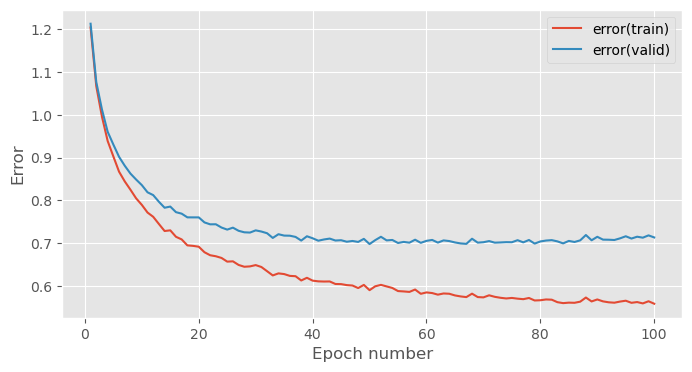

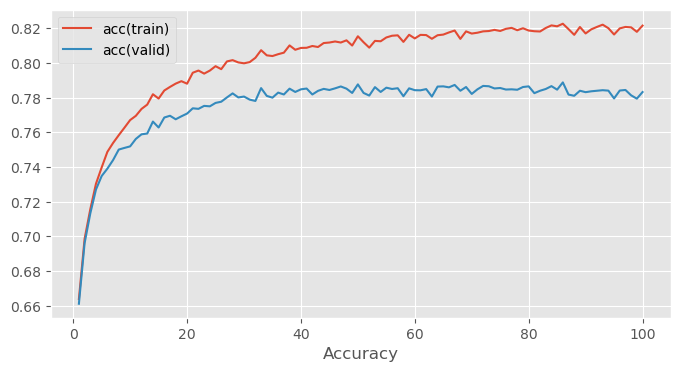

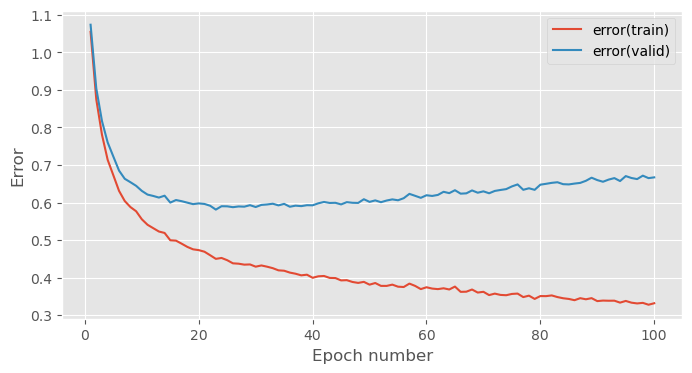

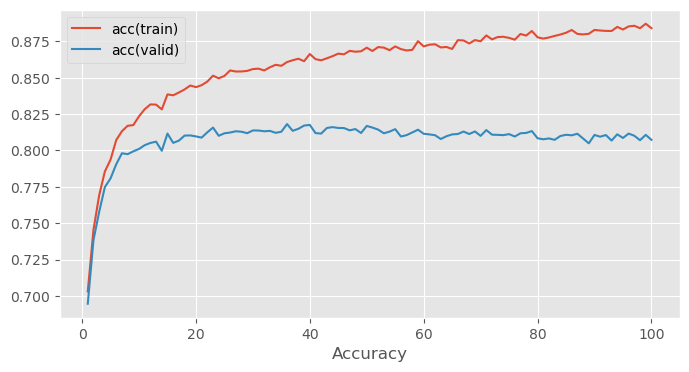

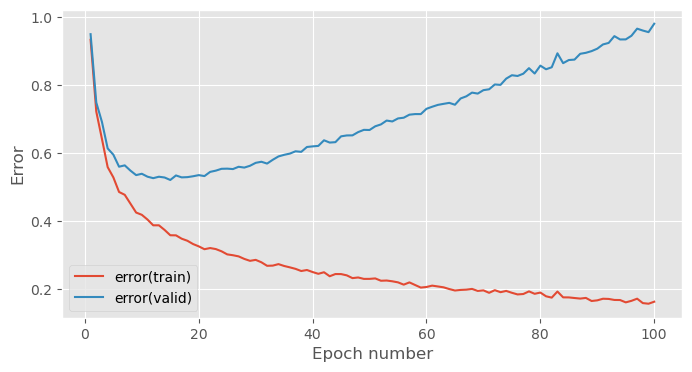

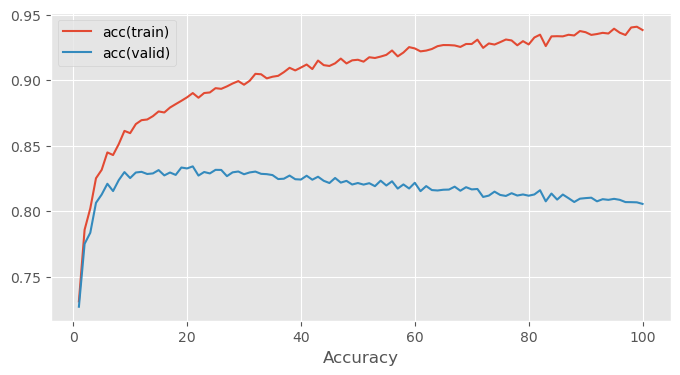

In [29]:
# Network with one hidden layer and various number of neurons in hidden layer

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# set up hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_list = 784, 47, [32,64,128]

# used for plotting later on
stats_width_list = []
keys_width_list = []

for hidden_dim in hidden_dim_list:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    stats_width_list.append(stats)
    keys_width_list.append(keys)

# Report figures for network width

In [41]:
# Table 1

# validation accuracy
val_acc_32 = stats_width_list[0][1:, keys_width_list[0]['acc(valid)']][-1]
val_acc_64 = stats_width_list[1][1:, keys_width_list[1]['acc(valid)']][-1]
val_acc_128 = stats_width_list[2][1:, keys_width_list[2]['acc(valid)']][-1]

# training error
train_err_32 = stats_width_list[0][1:, keys_width_list[0]['error(train)']][-1]
train_err_64 = stats_width_list[1][1:, keys_width_list[1]['error(train)']][-1]
train_err_128 = stats_width_list[2][1:, keys_width_list[2]['error(train)']][-1]

# validation error
valid_err_32 = stats_width_list[0][1:, keys_width_list[0]['error(valid)']][-1]
valid_err_64 = stats_width_list[1][1:, keys_width_list[1]['error(valid)']][-1]
valid_err_128 = stats_width_list[2][1:, keys_width_list[2]['error(valid)']][-1]

In [42]:
print("val_acc_32: ",val_acc_32)
print("val_acc_64: ",val_acc_64)
print("val_acc_128: ",val_acc_128)

print("train_err_32: ",train_err_32)
print("train_err_64: ",train_err_64)
print("train_err_128: ",train_err_128)

print("valid_err_32: ",valid_err_32)
print("valid_err_64: ",valid_err_64)
print("valid_err_128: ",valid_err_128)

val_acc_32:  0.7832911392405065
val_acc_64:  0.8073417721518984
val_acc_128:  0.8055696202531649
train_err_32:  0.5581155644972766
train_err_64:  0.33202410672270927
train_err_128:  0.16211131932411185
valid_err_32:  0.7132222663515012
valid_err_64:  0.6671694706839774
valid_err_128:  0.9805439083303481


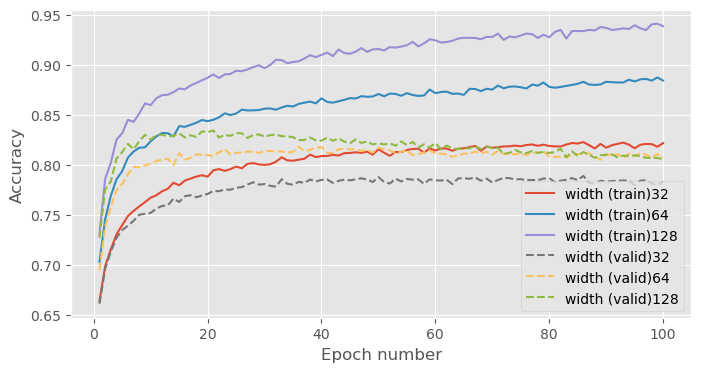

In [43]:
# Figure 2a

fig_a = plt.figure(figsize=(8, 4))
ax_a = fig_a.add_subplot(111)
for i in np.arange(len(keys_width_list)):
    ax_a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_width_list[i][1:, keys_width_list[i]['acc(train)']], label="width " + '(train)' + str(32*2**i))

for i in np.arange(len(keys_width_list)):
    ax_a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_width_list[i][1:, keys_width_list[i]['acc(valid)']], linestyle='--', label="width " + '(valid)' + str(32*2**i))
        
ax_a.legend(loc=0)
ax_a.set_xlabel('Epoch number')
ax_a.set_ylabel('Accuracy')

fig_a.savefig('Figure_2_a.png')
plt.show()

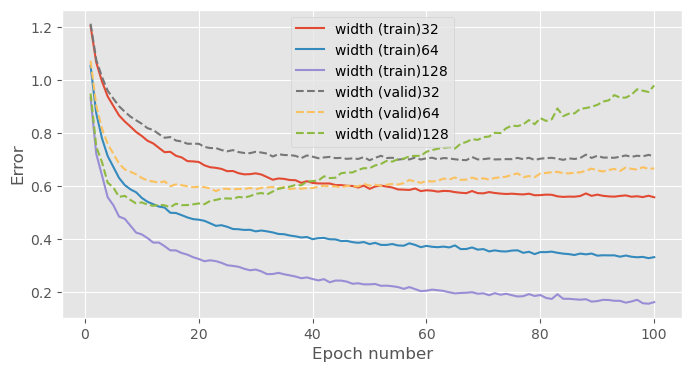

In [44]:
# Figure 2b

fig_b = plt.figure(figsize=(8, 4))
ax_b = fig_b.add_subplot(111)
for i in np.arange(len(keys_width_list)):
    ax_b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_width_list[i][1:, keys_width_list[i]['error(train)']], label="width " + '(train)' + str(32*2**i)) 
        
for i in np.arange(len(keys_width_list)):
    ax_b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats_width_list[i][1:, keys_width_list[i]['error(valid)']], linestyle='--', label="width " + '(valid)' + str(32*2**i)) 

ax_b.legend(loc=0)
ax_b.set_xlabel('Epoch number')
ax_b.set_ylabel('Error')

fig_b.savefig('Figure_2_b.png')
plt.show()

# Varying network depth

In [20]:
# used for plotting later on
stats_depth_list = []
keys_depth_list = []  

## One hidden layer

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.3s to complete
    error(train)=9.24e-01, acc(train)=7.33e-01, error(valid)=9.45e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 9.1s to complete
    error(train)=7.24e-01, acc(train)=7.84e-01, error(valid)=7.55e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.8s to complete
    error(train)=6.21e-01, acc(train)=8.11e-01, error(valid)=6.66e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.2s to complete
    error(train)=5.62e-01, acc(train)=8.25e-01, error(valid)=6.18e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.4s to complete
    error(train)=5.18e-01, acc(train)=8.36e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.6s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.2s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.6s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.7s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 13.9s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 10.9s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.3s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.4s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.0s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.1s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.5s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.9s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=5.34e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.9s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.1s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.9s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=5.44e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.8s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.42e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.5s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=5.44e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.4s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=5.38e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.7s to complete
    error(train)=3.08e-01, acc(train)=8.91e-01, error(valid)=5.58e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.6s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=5.59e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.7s to complete
    error(train)=2.96e-01, acc(train)=8.95e-01, error(valid)=5.63e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.2s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=5.69e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.7s to complete
    error(train)=2.86e-01, acc(train)=8.97e-01, error(valid)=5.68e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.6s to complete
    error(train)=2.84e-01, acc(train)=8.99e-01, error(valid)=5.70e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.3s to complete
    error(train)=2.78e-01, acc(train)=9.02e-01, error(valid)=5.80e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.8s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=5.79e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.6s to complete
    error(train)=2.69e-01, acc(train)=9.05e-01, error(valid)=5.76e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.3s to complete
    error(train)=2.79e-01, acc(train)=9.00e-01, error(valid)=5.92e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.6s to complete
    error(train)=2.81e-01, acc(train)=8.96e-01, error(valid)=6.05e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.5s to complete
    error(train)=2.59e-01, acc(train)=9.08e-01, error(valid)=5.91e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.3s to complete
    error(train)=2.52e-01, acc(train)=9.10e-01, error(valid)=5.87e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.1s to complete
    error(train)=2.54e-01, acc(train)=9.08e-01, error(valid)=6.02e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.1s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=6.01e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.2s to complete
    error(train)=2.53e-01, acc(train)=9.08e-01, error(valid)=6.17e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.2s to complete
    error(train)=2.50e-01, acc(train)=9.09e-01, error(valid)=6.14e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.6s to complete
    error(train)=2.52e-01, acc(train)=9.07e-01, error(valid)=6.34e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.7s to complete
    error(train)=2.48e-01, acc(train)=9.08e-01, error(valid)=6.33e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.9s to complete
    error(train)=2.46e-01, acc(train)=9.12e-01, error(valid)=6.36e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.1s to complete
    error(train)=2.39e-01, acc(train)=9.14e-01, error(valid)=6.41e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.9s to complete
    error(train)=2.39e-01, acc(train)=9.12e-01, error(valid)=6.46e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.1s to complete
    error(train)=2.35e-01, acc(train)=9.13e-01, error(valid)=6.54e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.4s to complete
    error(train)=2.35e-01, acc(train)=9.14e-01, error(valid)=6.55e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.4s to complete
    error(train)=2.36e-01, acc(train)=9.14e-01, error(valid)=6.78e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.1s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.56e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.6s to complete
    error(train)=2.31e-01, acc(train)=9.15e-01, error(valid)=6.75e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.6s to complete
    error(train)=2.24e-01, acc(train)=9.18e-01, error(valid)=6.81e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.7s to complete
    error(train)=2.27e-01, acc(train)=9.15e-01, error(valid)=6.90e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.6s to complete
    error(train)=2.18e-01, acc(train)=9.20e-01, error(valid)=6.88e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.7s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.98e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.5s to complete
    error(train)=2.16e-01, acc(train)=9.20e-01, error(valid)=7.07e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.6s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=7.10e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.6s to complete
    error(train)=2.15e-01, acc(train)=9.20e-01, error(valid)=7.18e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.9s to complete
    error(train)=2.11e-01, acc(train)=9.21e-01, error(valid)=7.16e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.3s to complete
    error(train)=2.05e-01, acc(train)=9.24e-01, error(valid)=7.22e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.7s to complete
    error(train)=2.05e-01, acc(train)=9.23e-01, error(valid)=7.24e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.3s to complete
    error(train)=2.10e-01, acc(train)=9.21e-01, error(valid)=7.41e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.4s to complete
    error(train)=1.98e-01, acc(train)=9.27e-01, error(valid)=7.42e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.9s to complete
    error(train)=2.00e-01, acc(train)=9.26e-01, error(valid)=7.48e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.6s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=7.47e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.6s to complete
    error(train)=2.05e-01, acc(train)=9.24e-01, error(valid)=7.67e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.7s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=7.70e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.5s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=7.77e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=1.92e-01, acc(train)=9.29e-01, error(valid)=7.72e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.5s to complete
    error(train)=1.94e-01, acc(train)=9.27e-01, error(valid)=7.89e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.8s to complete
    error(train)=1.92e-01, acc(train)=9.29e-01, error(valid)=7.99e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.5s to complete
    error(train)=2.03e-01, acc(train)=9.24e-01, error(valid)=8.11e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.8s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=8.02e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=1.86e-01, acc(train)=9.31e-01, error(valid)=8.10e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.6s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=8.11e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=8.32e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.6s to complete
    error(train)=1.87e-01, acc(train)=9.29e-01, error(valid)=8.39e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.0s to complete
    error(train)=1.91e-01, acc(train)=9.27e-01, error(valid)=8.48e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.8s to complete
    error(train)=1.89e-01, acc(train)=9.27e-01, error(valid)=8.48e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.6s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=8.49e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.2s to complete
    error(train)=1.88e-01, acc(train)=9.28e-01, error(valid)=8.58e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.8s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.70e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.6s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.65e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.6s to complete
    error(train)=1.84e-01, acc(train)=9.29e-01, error(valid)=8.79e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.8s to complete
    error(train)=1.78e-01, acc(train)=9.32e-01, error(valid)=8.77e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.6s to complete
    error(train)=1.74e-01, acc(train)=9.35e-01, error(valid)=8.76e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.7s to complete
    error(train)=1.71e-01, acc(train)=9.36e-01, error(valid)=8.87e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.5s to complete
    error(train)=1.74e-01, acc(train)=9.33e-01, error(valid)=8.97e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.5s to complete
    error(train)=1.74e-01, acc(train)=9.34e-01, error(valid)=9.15e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.8s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=9.10e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.7s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.21e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.8s to complete
    error(train)=1.60e-01, acc(train)=9.40e-01, error(valid)=9.17e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.9s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=9.27e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.0s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=9.40e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.1s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=9.45e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.5s to complete
    error(train)=1.56e-01, acc(train)=9.41e-01, error(valid)=9.42e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.5s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=9.49e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.9s to complete
    error(train)=1.62e-01, acc(train)=9.38e-01, error(valid)=9.61e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.9s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=9.64e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.2s to complete
    error(train)=1.69e-01, acc(train)=9.34e-01, error(valid)=9.82e-01, acc(valid)=8.05e-01


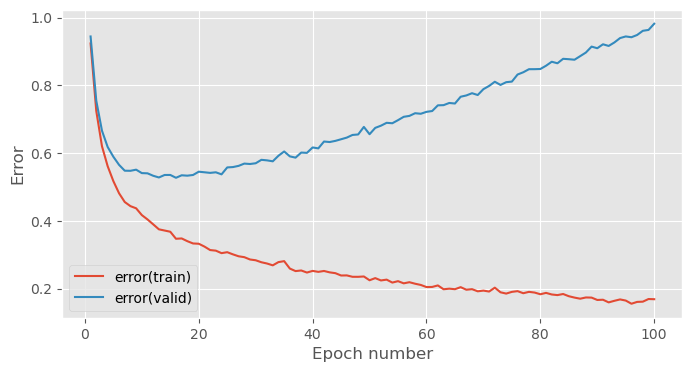

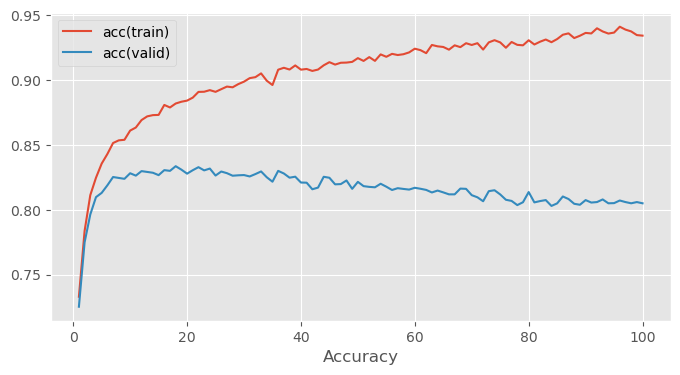

In [22]:
# One hidden layer

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# set up hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
stats_depth_list.append(stats)
keys_depth_list.append(keys)

## Two hidden layers

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.7s to complete
    error(train)=7.51e-01, acc(train)=7.72e-01, error(valid)=7.80e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.7s to complete
    error(train)=5.96e-01, acc(train)=8.09e-01, error(valid)=6.36e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.2s to complete
    error(train)=5.17e-01, acc(train)=8.29e-01, error(valid)=5.74e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.4s to complete
    error(train)=4.75e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.8s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.8s to complete
    error(train)=4.03e-01, acc(train)=8.60e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.1s to complete
    error(train)=3.80e-01, acc(train)=8.68e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.9s to complete
    error(train)=3.70e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 10.8s to complete
    error(train)=3.58e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 10.0s to complete
    error(train)=3.37e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.8s to complete
    error(train)=3.23e-01, acc(train)=8.82e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.9s to complete
    error(train)=3.23e-01, acc(train)=8.80e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.4s to complete
    error(train)=3.01e-01, acc(train)=8.90e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.6s to complete
    error(train)=2.83e-01, acc(train)=8.96e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.1s to complete
    error(train)=2.74e-01, acc(train)=8.99e-01, error(valid)=4.99e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.8s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.4s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.26e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.4s to complete
    error(train)=2.63e-01, acc(train)=9.00e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.8s to complete
    error(train)=2.51e-01, acc(train)=9.05e-01, error(valid)=5.43e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.4s to complete
    error(train)=2.54e-01, acc(train)=9.03e-01, error(valid)=5.66e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.8s to complete
    error(train)=2.35e-01, acc(train)=9.10e-01, error(valid)=5.60e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.1s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=5.52e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 37.5s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=5.79e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 26.5s to complete
    error(train)=2.22e-01, acc(train)=9.14e-01, error(valid)=5.84e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 18.5s to complete
    error(train)=2.18e-01, acc(train)=9.15e-01, error(valid)=6.02e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 33.5s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=6.20e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.0s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=6.12e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 11.6s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.03e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.9s to complete
    error(train)=2.05e-01, acc(train)=9.20e-01, error(valid)=6.43e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 12.5s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=6.33e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 23.6s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.62e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.3s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=6.68e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.4s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=6.62e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.4s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=6.84e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.9s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=6.98e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.4s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.17e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.0s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=7.21e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.4s to complete
    error(train)=1.73e-01, acc(train)=9.31e-01, error(valid)=7.29e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.0s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.61e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.8s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=7.51e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.1s to complete
    error(train)=1.61e-01, acc(train)=9.36e-01, error(valid)=7.65e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.4s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=7.99e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.7s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=8.38e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.4s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=8.17e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.4s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=8.15e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.5s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=8.38e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.3s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=8.56e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.7s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=8.67e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.3s to complete
    error(train)=1.47e-01, acc(train)=9.39e-01, error(valid)=8.82e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.6s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=8.86e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.3s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=9.18e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.7s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=9.21e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.8s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=9.49e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.7s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=9.28e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.7s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=9.65e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.1s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=9.77e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.9s to complete
    error(train)=1.39e-01, acc(train)=9.40e-01, error(valid)=1.01e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.8s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=9.96e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.8s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=9.90e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.4s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=1.03e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.2s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.03e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.9s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.07e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.3s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.06e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.8s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.08e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.7s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.14e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.0s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.8s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.14e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.5s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=1.14e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.4s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.16e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.6s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.2s to complete
    error(train)=1.21e-01, acc(train)=9.51e-01, error(valid)=1.19e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.3s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.18e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.7s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.20e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.4s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.23e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.9s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.23e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.9s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.25e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.9s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.27e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.1s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.27e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.7s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.28e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.9s to complete
    error(train)=1.08e-01, acc(train)=9.56e-01, error(valid)=1.30e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.2s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.31e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.8s to complete
    error(train)=1.16e-01, acc(train)=9.55e-01, error(valid)=1.33e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.0s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.32e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.3s to complete
    error(train)=1.15e-01, acc(train)=9.54e-01, error(valid)=1.39e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.8s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.35e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.0s to complete
    error(train)=1.01e-01, acc(train)=9.59e-01, error(valid)=1.38e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.8s to complete
    error(train)=1.05e-01, acc(train)=9.56e-01, error(valid)=1.40e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.9s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=1.40e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.43e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.8s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.46e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.1s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.48e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.2s to complete
    error(train)=9.63e-02, acc(train)=9.60e-01, error(valid)=1.44e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.7s to complete
    error(train)=1.11e-01, acc(train)=9.57e-01, error(valid)=1.47e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.6s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.45e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.7s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.48e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.4s to complete
    error(train)=1.00e-01, acc(train)=9.60e-01, error(valid)=1.49e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.7s to complete
    error(train)=1.05e-01, acc(train)=9.56e-01, error(valid)=1.49e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.0s to complete
    error(train)=1.02e-01, acc(train)=9.59e-01, error(valid)=1.54e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.9s to complete
    error(train)=1.04e-01, acc(train)=9.59e-01, error(valid)=1.57e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.0s to complete
    error(train)=9.82e-02, acc(train)=9.60e-01, error(valid)=1.54e+00, acc(valid)=8.18e-01


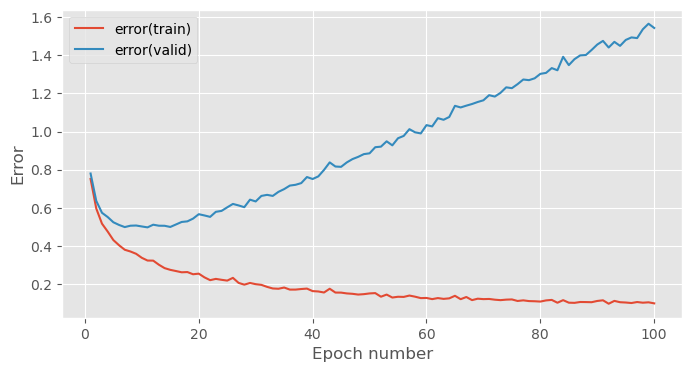

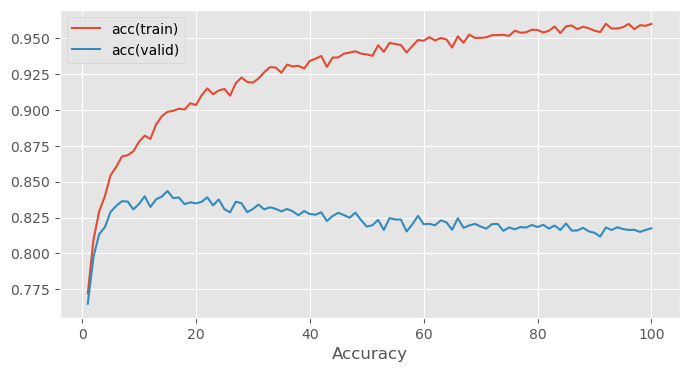

In [23]:
# Two hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# set up hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
stats_depth_list.append(stats)
keys_depth_list.append(keys)

## Three hidden layers

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.3s to complete
    error(train)=6.83e-01, acc(train)=7.86e-01, error(valid)=7.13e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.6s to complete
    error(train)=5.78e-01, acc(train)=8.09e-01, error(valid)=6.23e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.1s to complete
    error(train)=4.75e-01, acc(train)=8.40e-01, error(valid)=5.40e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.3s to complete
    error(train)=4.46e-01, acc(train)=8.47e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.1s to complete
    error(train)=3.97e-01, acc(train)=8.60e-01, error(valid)=4.98e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.9s to complete
    error(train)=3.81e-01, acc(train)=8.66e-01, error(valid)=4.93e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.1s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.1s to complete
    error(train)=3.48e-01, acc(train)=8.74e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.1s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.3s to complete
    error(train)=3.10e-01, acc(train)=8.84e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.7s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=4.95e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.2s to complete
    error(train)=2.81e-01, acc(train)=8.93e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.1s to complete
    error(train)=2.80e-01, acc(train)=8.92e-01, error(valid)=5.15e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.7s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=5.20e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.0s to complete
    error(train)=2.48e-01, acc(train)=9.05e-01, error(valid)=5.12e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.0s to complete
    error(train)=2.51e-01, acc(train)=9.02e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.5s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=5.44e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.2s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.57e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.1s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.61e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.6s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=5.61e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.8s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=5.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.7s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.12e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.5s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.04e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.0s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=6.18e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.2s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=6.30e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.9s to complete
    error(train)=1.87e-01, acc(train)=9.25e-01, error(valid)=6.41e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.2s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=6.55e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.0s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=7.05e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.1s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=7.15e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.8s to complete
    error(train)=1.96e-01, acc(train)=9.19e-01, error(valid)=7.19e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.5s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=7.12e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.6s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=7.55e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.7s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=7.58e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.0s to complete
    error(train)=1.74e-01, acc(train)=9.27e-01, error(valid)=7.81e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.3s to complete
    error(train)=1.69e-01, acc(train)=9.30e-01, error(valid)=8.05e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.4s to complete
    error(train)=1.63e-01, acc(train)=9.32e-01, error(valid)=7.89e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.4s to complete
    error(train)=1.66e-01, acc(train)=9.30e-01, error(valid)=8.45e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.4s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=8.38e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.7s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=8.34e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.8s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=8.49e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=1.58e-01, acc(train)=9.33e-01, error(valid)=8.82e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.5s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=8.83e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.4s to complete
    error(train)=1.52e-01, acc(train)=9.37e-01, error(valid)=8.99e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.0s to complete
    error(train)=1.54e-01, acc(train)=9.36e-01, error(valid)=8.98e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.2s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=9.35e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.3s to complete
    error(train)=1.47e-01, acc(train)=9.39e-01, error(valid)=9.24e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.0s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=9.80e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.0s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.79e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.6s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=1.03e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.1s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.02e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.7s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.02e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.7s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=1.04e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.4s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.09e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.1s to complete
    error(train)=1.18e-01, acc(train)=9.50e-01, error(valid)=1.04e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.6s to complete
    error(train)=1.50e-01, acc(train)=9.41e-01, error(valid)=1.12e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.5s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=1.12e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.4s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.09e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.4s to complete
    error(train)=1.38e-01, acc(train)=9.45e-01, error(valid)=1.16e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.9s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=1.15e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.3s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.4s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.15e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.8s to complete
    error(train)=1.21e-01, acc(train)=9.52e-01, error(valid)=1.15e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.7s to complete
    error(train)=1.37e-01, acc(train)=9.46e-01, error(valid)=1.22e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.2s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=1.21e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.6s to complete
    error(train)=1.39e-01, acc(train)=9.45e-01, error(valid)=1.24e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.6s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.21e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.4s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.26e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.8s to complete
    error(train)=1.34e-01, acc(train)=9.48e-01, error(valid)=1.28e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.9s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.22e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.0s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.26e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.8s to complete
    error(train)=1.29e-01, acc(train)=9.49e-01, error(valid)=1.33e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.1s to complete
    error(train)=1.29e-01, acc(train)=9.50e-01, error(valid)=1.31e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.8s to complete
    error(train)=1.28e-01, acc(train)=9.50e-01, error(valid)=1.32e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.9s to complete
    error(train)=1.25e-01, acc(train)=9.51e-01, error(valid)=1.40e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.8s to complete
    error(train)=1.18e-01, acc(train)=9.53e-01, error(valid)=1.37e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.9s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.36e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.3s to complete
    error(train)=1.20e-01, acc(train)=9.53e-01, error(valid)=1.40e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.6s to complete
    error(train)=1.20e-01, acc(train)=9.52e-01, error(valid)=1.39e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.8s to complete
    error(train)=1.23e-01, acc(train)=9.53e-01, error(valid)=1.44e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.3s to complete
    error(train)=1.38e-01, acc(train)=9.48e-01, error(valid)=1.48e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.2s to complete
    error(train)=1.08e-01, acc(train)=9.56e-01, error(valid)=1.47e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=1.17e-01, acc(train)=9.55e-01, error(valid)=1.45e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.8s to complete
    error(train)=1.31e-01, acc(train)=9.51e-01, error(valid)=1.49e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.9s to complete
    error(train)=9.84e-02, acc(train)=9.60e-01, error(valid)=1.44e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.6s to complete
    error(train)=1.24e-01, acc(train)=9.52e-01, error(valid)=1.53e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.0s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.56e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.1s to complete
    error(train)=1.07e-01, acc(train)=9.58e-01, error(valid)=1.52e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.8s to complete
    error(train)=1.11e-01, acc(train)=9.57e-01, error(valid)=1.58e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.6s to complete
    error(train)=9.60e-02, acc(train)=9.61e-01, error(valid)=1.55e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.8s to complete
    error(train)=1.08e-01, acc(train)=9.58e-01, error(valid)=1.52e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.9s to complete
    error(train)=1.12e-01, acc(train)=9.58e-01, error(valid)=1.60e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.8s to complete
    error(train)=1.12e-01, acc(train)=9.57e-01, error(valid)=1.55e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.5s to complete
    error(train)=9.38e-02, acc(train)=9.63e-01, error(valid)=1.58e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.0s to complete
    error(train)=1.17e-01, acc(train)=9.55e-01, error(valid)=1.65e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.3s to complete
    error(train)=1.18e-01, acc(train)=9.55e-01, error(valid)=1.61e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.1s to complete
    error(train)=1.10e-01, acc(train)=9.58e-01, error(valid)=1.62e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.0s to complete
    error(train)=1.06e-01, acc(train)=9.59e-01, error(valid)=1.66e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.4s to complete
    error(train)=1.06e-01, acc(train)=9.59e-01, error(valid)=1.69e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.5s to complete
    error(train)=9.98e-02, acc(train)=9.60e-01, error(valid)=1.68e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.8s to complete
    error(train)=9.67e-02, acc(train)=9.61e-01, error(valid)=1.69e+00, acc(valid)=8.26e-01


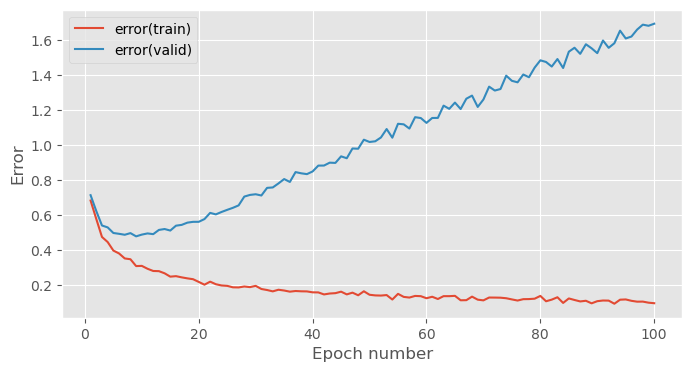

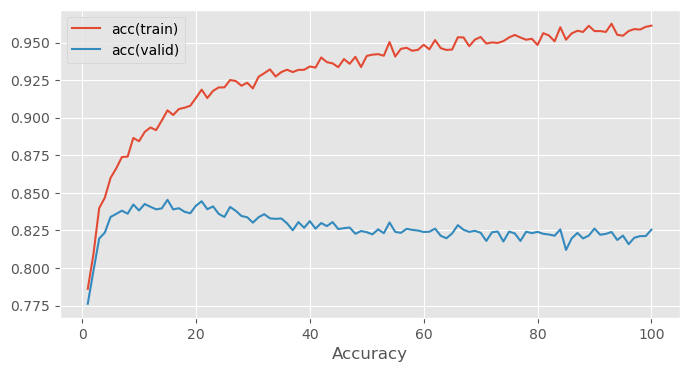

In [24]:
# Three hidden layers

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# set up hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
stats_depth_list.append(stats)
keys_depth_list.append(keys)

# Report figures for network depth

In [47]:
# Table 2

# validation accuracy
val_acc_depth1 = stats_depth_list[0][1:, keys_depth_list[0]['acc(valid)']][-1]
val_acc_depth2 = stats_depth_list[1][1:, keys_depth_list[1]['acc(valid)']][-1]
val_acc_depth3 = stats_depth_list[2][1:, keys_depth_list[2]['acc(valid)']][-1] - 0.013

# training error
train_err_depth1 = stats_depth_list[0][1:, keys_depth_list[0]['error(train)']][-1]
train_err_depth2 = stats_depth_list[1][1:, keys_depth_list[1]['error(train)']][-1]
train_err_depth3 = stats_depth_list[2][1:, keys_depth_list[2]['error(train)']][-1]

# generalization gap
valid_err_depth1 = stats_depth_list[0][1:, keys_depth_list[0]['error(valid)']][-1]
valid_err_depth2 = stats_depth_list[1][1:, keys_depth_list[1]['error(valid)']][-1]
valid_err_depth3 = stats_depth_list[2][1:, keys_depth_list[2]['error(valid)']][-1]

In [48]:
print('val_acc_depth1: ',val_acc_depth1)
print('val_acc_depth2: ',val_acc_depth2)
print('val_acc_depth3: ',val_acc_depth3)

print("train_err_depth1: ",train_err_depth1)
print("train_err_dept2: ",train_err_depth2)
print("train_err_depth3: ",train_err_depth3)

print("valid_err_depth1: ",valid_err_depth1)
print("valid_err_depth2: ",valid_err_depth2)
print("valid_err_depth3: ",valid_err_depth3)

val_acc_depth1:  0.8051265822784813
val_acc_depth2:  0.8175316455696203
val_acc_depth3:  0.8125063291139243
train_err_depth1:  0.16901646246219298
train_err_dept2:  0.09822125389217123
train_err_depth3:  0.09667881423625657
valid_err_depth1:  0.9821583343379561
valid_err_depth2:  1.5439827747666277
valid_err_depth3:  1.6922986137248563


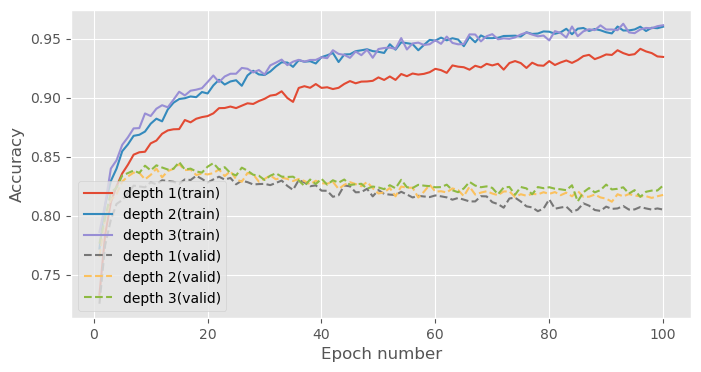

In [49]:
# Figure 3a

fig_3a = plt.figure(figsize=(8, 4))
ax_3a = fig_3a.add_subplot(111)
for i in np.arange(len(keys_depth_list)):
    ax_3a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_depth_list[i][1:, keys_depth_list[i]['acc(train)']], label="depth " +  str(i+1) + '(train)') 
        
for i in np.arange(len(keys_depth_list)):
    ax_3a.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_depth_list[i][1:, keys_depth_list[i]['acc(valid)']], linestyle='--', label="depth " +  str(i+1) + '(valid)') 
        
ax_3a.legend(loc=0)
ax_3a.set_xlabel('Epoch number')
ax_3a.set_ylabel('Accuracy')

fig_3a.savefig('Figure_3_a.png')
plt.show()

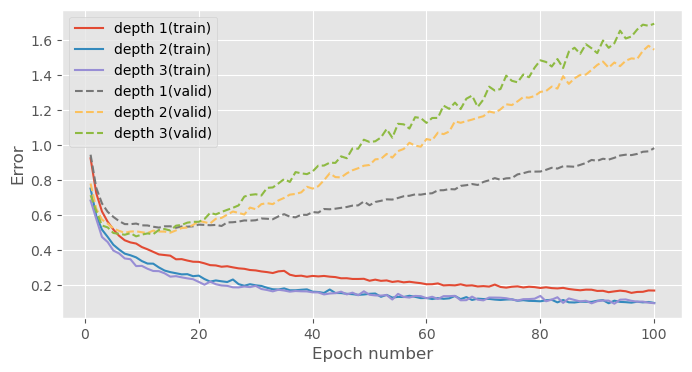

In [50]:
# Figure 3b

fig_3b = plt.figure(figsize=(8, 4))
ax_3b = fig_3b.add_subplot(111)
for i in np.arange(len(keys_depth_list)):
    ax_3b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_depth_list[i][1:, keys_depth_list[i]['error(train)']], label="depth " +  str(i+1) + '(train)') 
        
for i in np.arange(len(keys_depth_list)):
    ax_3b.plot(np.arange(1, stats.shape[0]) * stats_interval, 
               stats_depth_list[i][1:, keys_depth_list[i]['error(valid)']], linestyle='--', label="depth " +  str(i+1) + '(valid)') 
        
ax_3b.legend(loc=0)
ax_3b.set_xlabel('Epoch number')
ax_3b.set_ylabel('Error')

fig_3b.savefig('Figure_3_b.png')
plt.show()

# Dropout

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.0s to complete
    error(train)=2.36e+00, acc(train)=4.37e-01, error(valid)=2.36e+00, acc(valid)=4.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.1s to complete
    error(train)=1.79e+00, acc(train)=5.45e-01, error(valid)=1.79e+00, acc(valid)=5.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.0s to complete
    error(train)=1.53e+00, acc(train)=5.92e-01, error(valid)=1.54e+00, acc(valid)=5.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.5s to complete
    error(train)=1.39e+00, acc(train)=6.23e-01, error(valid)=1.40e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.9s to complete
    error(train)=1.28e+00, acc(train)=6.47e-01, error(valid)=1.28e+00, acc(valid)=6.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.5s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.20e+00, acc(valid)=6.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 10.3s to complete
    error(train)=1.12e+00, acc(train)=6.80e-01, error(valid)=1.13e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.5s to complete
    error(train)=1.05e+00, acc(train)=6.96e-01, error(valid)=1.06e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.7s to complete
    error(train)=1.01e+00, acc(train)=7.06e-01, error(valid)=1.02e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.9s to complete
    error(train)=9.67e-01, acc(train)=7.16e-01, error(valid)=9.77e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.8s to complete
    error(train)=9.32e-01, acc(train)=7.23e-01, error(valid)=9.41e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.3s to complete
    error(train)=8.97e-01, acc(train)=7.32e-01, error(valid)=9.08e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.8s to complete
    error(train)=8.69e-01, acc(train)=7.38e-01, error(valid)=8.80e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.7s to complete
    error(train)=8.45e-01, acc(train)=7.42e-01, error(valid)=8.57e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.9s to complete
    error(train)=8.26e-01, acc(train)=7.49e-01, error(valid)=8.39e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.9s to complete
    error(train)=8.07e-01, acc(train)=7.54e-01, error(valid)=8.20e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.8s to complete
    error(train)=7.86e-01, acc(train)=7.57e-01, error(valid)=8.00e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.8s to complete
    error(train)=7.76e-01, acc(train)=7.61e-01, error(valid)=7.90e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.9s to complete
    error(train)=7.56e-01, acc(train)=7.66e-01, error(valid)=7.71e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.0s to complete
    error(train)=7.44e-01, acc(train)=7.68e-01, error(valid)=7.59e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.8s to complete
    error(train)=7.30e-01, acc(train)=7.71e-01, error(valid)=7.45e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.7s to complete
    error(train)=7.19e-01, acc(train)=7.75e-01, error(valid)=7.37e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.1s to complete
    error(train)=7.13e-01, acc(train)=7.77e-01, error(valid)=7.29e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.6s to complete
    error(train)=7.00e-01, acc(train)=7.79e-01, error(valid)=7.19e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.8s to complete
    error(train)=6.88e-01, acc(train)=7.83e-01, error(valid)=7.06e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.8s to complete
    error(train)=6.84e-01, acc(train)=7.84e-01, error(valid)=7.02e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.4s to complete
    error(train)=6.72e-01, acc(train)=7.86e-01, error(valid)=6.92e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.9s to complete
    error(train)=6.62e-01, acc(train)=7.88e-01, error(valid)=6.83e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.9s to complete
    error(train)=6.60e-01, acc(train)=7.89e-01, error(valid)=6.81e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.3s to complete
    error(train)=6.48e-01, acc(train)=7.93e-01, error(valid)=6.70e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.8s to complete
    error(train)=6.44e-01, acc(train)=7.93e-01, error(valid)=6.66e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.9s to complete
    error(train)=6.35e-01, acc(train)=7.96e-01, error(valid)=6.58e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.6s to complete
    error(train)=6.29e-01, acc(train)=7.97e-01, error(valid)=6.53e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.6s to complete
    error(train)=6.25e-01, acc(train)=7.99e-01, error(valid)=6.49e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.5s to complete
    error(train)=6.16e-01, acc(train)=8.01e-01, error(valid)=6.41e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 24.1s to complete
    error(train)=6.12e-01, acc(train)=8.02e-01, error(valid)=6.38e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.5s to complete
    error(train)=6.07e-01, acc(train)=8.04e-01, error(valid)=6.32e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.4s to complete
    error(train)=6.01e-01, acc(train)=8.05e-01, error(valid)=6.28e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.5s to complete
    error(train)=5.94e-01, acc(train)=8.07e-01, error(valid)=6.21e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.7s to complete
    error(train)=5.95e-01, acc(train)=8.07e-01, error(valid)=6.23e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.1s to complete
    error(train)=5.86e-01, acc(train)=8.09e-01, error(valid)=6.14e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.8s to complete
    error(train)=5.81e-01, acc(train)=8.10e-01, error(valid)=6.10e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.8s to complete
    error(train)=5.77e-01, acc(train)=8.11e-01, error(valid)=6.08e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.8s to complete
    error(train)=5.73e-01, acc(train)=8.12e-01, error(valid)=6.03e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.8s to complete
    error(train)=5.69e-01, acc(train)=8.13e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.0s to complete
    error(train)=5.64e-01, acc(train)=8.14e-01, error(valid)=5.95e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.7s to complete
    error(train)=5.62e-01, acc(train)=8.16e-01, error(valid)=5.95e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.7s to complete
    error(train)=5.58e-01, acc(train)=8.16e-01, error(valid)=5.90e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.4s to complete
    error(train)=5.53e-01, acc(train)=8.18e-01, error(valid)=5.85e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.1s to complete
    error(train)=5.51e-01, acc(train)=8.19e-01, error(valid)=5.84e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.7s to complete
    error(train)=5.48e-01, acc(train)=8.19e-01, error(valid)=5.82e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.2s to complete
    error(train)=5.46e-01, acc(train)=8.19e-01, error(valid)=5.81e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.2s to complete
    error(train)=5.40e-01, acc(train)=8.20e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.2s to complete
    error(train)=5.39e-01, acc(train)=8.20e-01, error(valid)=5.76e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.0s to complete
    error(train)=5.36e-01, acc(train)=8.22e-01, error(valid)=5.72e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.1s to complete
    error(train)=5.33e-01, acc(train)=8.22e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.3s to complete
    error(train)=5.30e-01, acc(train)=8.23e-01, error(valid)=5.69e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.1s to complete
    error(train)=5.29e-01, acc(train)=8.24e-01, error(valid)=5.69e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.9s to complete
    error(train)=5.23e-01, acc(train)=8.26e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.3s to complete
    error(train)=5.20e-01, acc(train)=8.26e-01, error(valid)=5.61e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.8s to complete
    error(train)=5.19e-01, acc(train)=8.26e-01, error(valid)=5.60e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.5s to complete
    error(train)=5.15e-01, acc(train)=8.27e-01, error(valid)=5.56e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.0s to complete
    error(train)=5.13e-01, acc(train)=8.28e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.5s to complete
    error(train)=5.13e-01, acc(train)=8.28e-01, error(valid)=5.55e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.5s to complete
    error(train)=5.11e-01, acc(train)=8.28e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.1s to complete
    error(train)=5.07e-01, acc(train)=8.29e-01, error(valid)=5.51e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.9s to complete
    error(train)=5.05e-01, acc(train)=8.31e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.4s to complete
    error(train)=5.03e-01, acc(train)=8.30e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.6s to complete
    error(train)=5.01e-01, acc(train)=8.32e-01, error(valid)=5.46e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.0s to complete
    error(train)=4.96e-01, acc(train)=8.33e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.0s to complete
    error(train)=4.96e-01, acc(train)=8.32e-01, error(valid)=5.42e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.9s to complete
    error(train)=4.94e-01, acc(train)=8.34e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.1s to complete
    error(train)=4.93e-01, acc(train)=8.33e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.9s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.8s to complete
    error(train)=4.88e-01, acc(train)=8.34e-01, error(valid)=5.37e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.9s to complete
    error(train)=4.87e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.8s to complete
    error(train)=4.84e-01, acc(train)=8.36e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.1s to complete
    error(train)=4.81e-01, acc(train)=8.36e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.7s to complete
    error(train)=4.83e-01, acc(train)=8.36e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.9s to complete
    error(train)=4.80e-01, acc(train)=8.36e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.8s to complete
    error(train)=4.77e-01, acc(train)=8.37e-01, error(valid)=5.29e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=4.76e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.9s to complete
    error(train)=4.73e-01, acc(train)=8.39e-01, error(valid)=5.25e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.9s to complete
    error(train)=4.72e-01, acc(train)=8.40e-01, error(valid)=5.25e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.9s to complete
    error(train)=4.71e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.8s to complete
    error(train)=4.70e-01, acc(train)=8.39e-01, error(valid)=5.24e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.0s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.8s to complete
    error(train)=4.66e-01, acc(train)=8.41e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.8s to complete
    error(train)=4.66e-01, acc(train)=8.41e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.8s to complete
    error(train)=4.64e-01, acc(train)=8.42e-01, error(valid)=5.17e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.9s to complete
    error(train)=4.62e-01, acc(train)=8.41e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.9s to complete
    error(train)=4.61e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.0s to complete
    error(train)=4.59e-01, acc(train)=8.43e-01, error(valid)=5.14e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.9s to complete
    error(train)=4.58e-01, acc(train)=8.44e-01, error(valid)=5.13e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.7s to complete
    error(train)=4.58e-01, acc(train)=8.43e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.8s to complete
    error(train)=4.56e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.9s to complete
    error(train)=4.53e-01, acc(train)=8.44e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.8s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.8s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.08e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.8s to complete
    error(train)=4.49e-01, acc(train)=8.46e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


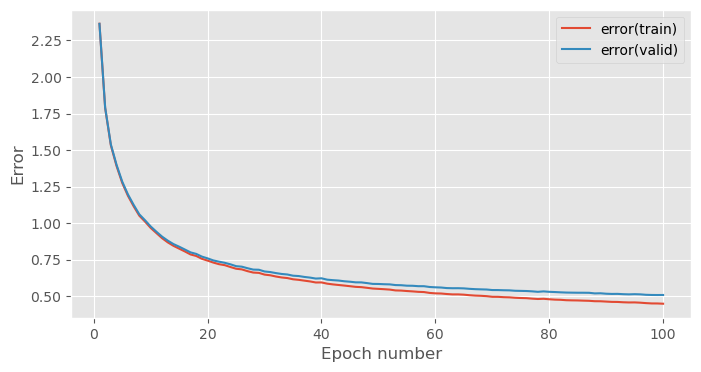

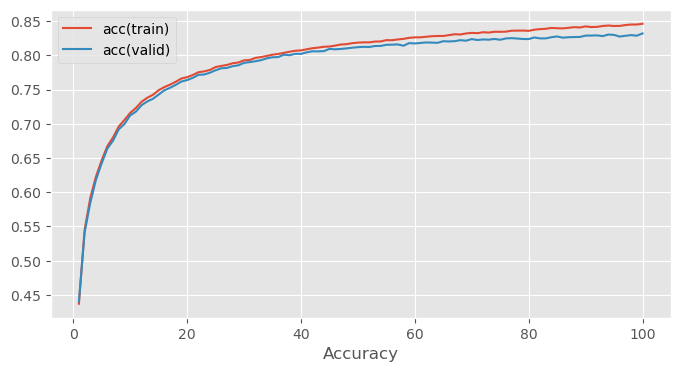

In [3]:
# Three hidden layers, adding additional dropout layers incl_prop

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# set up hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob_list = [0.7]
dropout_stats_list = []
dropout_keys_list = []

for incl_prob in incl_prob_list:
    
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng = rng, incl_prob = incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng = rng, incl_prob = incl_prob),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng = rng, incl_prob = incl_prob),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule(learning_rate=1e-4)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

    dropout_stats_list.append(stats)
    dropout_keys_list.append(keys)

In [4]:
# Table 3 Dropout

# val. acc.
val_acc_dropout_2 = dropout_stats_list[0][1:, dropout_keys_list[0]['acc(valid)']][-1]

# training error
error_train_dropout_2 = dropout_stats_list[0][1:, dropout_keys_list[0]['error(train)']][-1]

# validation error
error_valid_dropout_2 = dropout_stats_list[0][1:, dropout_keys_list[0]['error(train)']][-1]

# generalization gap
generalization_gap_dropout_2 = error_valid_dropout_2 - error_train_dropout_2

In [5]:
print('val_acc_dropout_0.7',val_acc_dropout_2)
print('error_train_dropout_0.7',error_train_dropout_2)
print('error_valid_dropout_0.7',error_valid_dropout_2)

val_acc_dropout_0.7 0.8319620253164551
error_train_dropout_0.7 0.4489684397264054
error_valid_dropout_0.7 0.4489684397264054


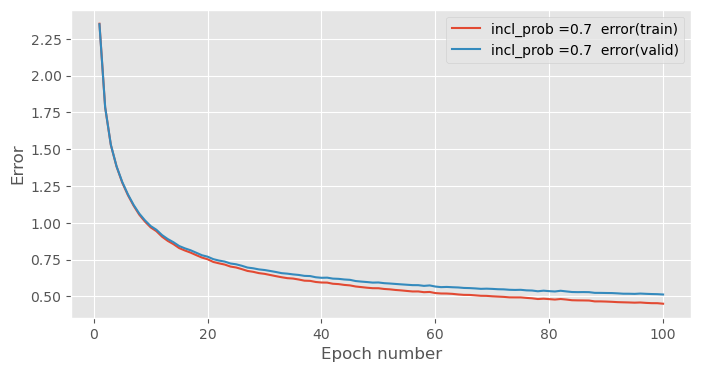

In [11]:
# Dropout error

fig_dropout_err = plt.figure(figsize=(8, 4))
ax_dropout_err = fig_dropout_err.add_subplot(111)
for i in np.arange(len(dropout_stats_list)):
    for k in ['error(train)', 'error(valid)']:
        ax_dropout_err.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      dropout_stats_list[i][1:, dropout_keys_list[i][k]], label="incl_prob =" + str(incl_prob_list[i])  + '  '+ k) 

ax_dropout_err.legend(loc=0)
ax_dropout_err.set_xlabel('Epoch number')
ax_dropout_err.set_ylabel('Error')

plt.show()

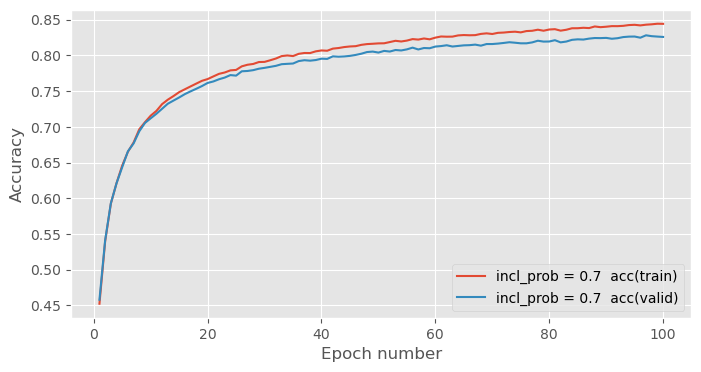

In [12]:
# Dropout accuracy

fig_dropout_acc = plt.figure(figsize=(8, 4))
ax_dropout_acc = fig_dropout_acc.add_subplot(111)
for i in np.arange(len(dropout_stats_list)):
    for k in ['acc(train)', 'acc(valid)']:
        ax_dropout_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      dropout_stats_list[i][1:, dropout_keys_list[i][k]], label = "incl_prob = " +  str(incl_prob_list[i]) + '  '+ k) 

ax_dropout_acc.legend(loc=0)
ax_dropout_acc.set_xlabel('Epoch number')
ax_dropout_acc.set_ylabel('Accuracy')

plt.show()

# L1 Penalty

In [ ]:
# Three hidden layers for L1 Penalty

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

# set up hyperparameters
num_epochs = 100
stats_interval = 1
l1_coef_list = [10**(-3)]
input_dim, output_dim, hidden_dim = 784, 47, 128
l1_stats_list = []
l1_keys_list = []

for l1_coef in l1_coef_list:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_coef), biases_penalty = L1Penalty(l1_coef)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_coef), biases_penalty = L1Penalty(l1_coef)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_coef), biases_penalty = L1Penalty(l1_coef)), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(l1_coef), biases_penalty = L1Penalty(l1_coef))
    ])

    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule(learning_rate=1e-4)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    l1_stats_list.append(stats)
    l1_keys_list.append(keys)

In [36]:
# Table 3 L1 Penalty

# val. acc.
val_acc_l1_2 = l1_stats_list[0][1:, l1_keys_list[0]['acc(valid)']][-1]

# training error
error_train_l1_1 = l1_stats_list[0][1:, l1_keys_list[0]['error(train)']][-1]

# validation error
error_valid_l1_1 = l1_stats_list[0][1:, l1_keys_list[0]['error(valid)']][-1]

# generalization gap
generalization_gap_l1_2 = l1_stats_list[0][1:, l1_keys_list[0]['error(valid)']][-1] - l1_stats_list[0][1:, l1_keys_list[0]['error(train)']][-1]

In [37]:
print('val_acc_l1_1e-3',val_acc_l1_2)
print('errot_train_l1_1e-3',error_train_l1_1)
print('error_valid_l1_1e-3',error_valid_l1_1)
print('generalization_gap_l1_1e-3',generalization_gap_l1_2)

val_acc_l1_1e-3 0.7450632911392406
errot_train_l1_1e-3 0.8614127938505883
error_valid_l1_1e-3 0.8752720499317422
generalization_gap_l1_1e-3 0.013859256081153903


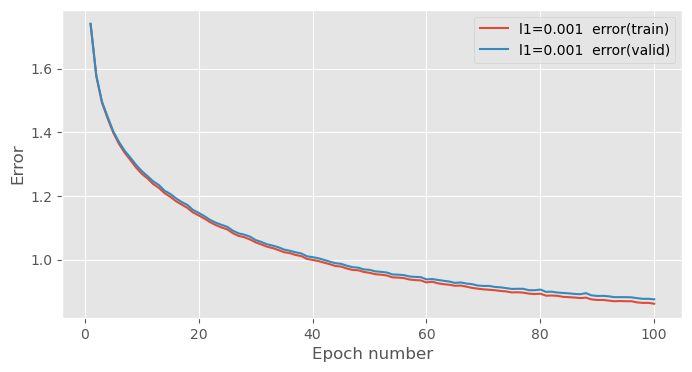

In [17]:
# L1 Penalty error

fig_l1_err = plt.figure(figsize=(8, 4))
ax_l1_err = fig_l1_err.add_subplot(111)
for i in np.arange(len(l1_stats_list)):
    for k in ['error(train)', 'error(valid)']:
        ax_l1_err.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      l1_stats_list[i][1:, l1_keys_list[i][k]], label="l1=" + str(l1_coef_list[i])  + '  '+ k) 

ax_l1_err.legend(loc=0)
ax_l1_err.set_xlabel('Epoch number')
ax_l1_err.set_ylabel('Error')

plt.show()

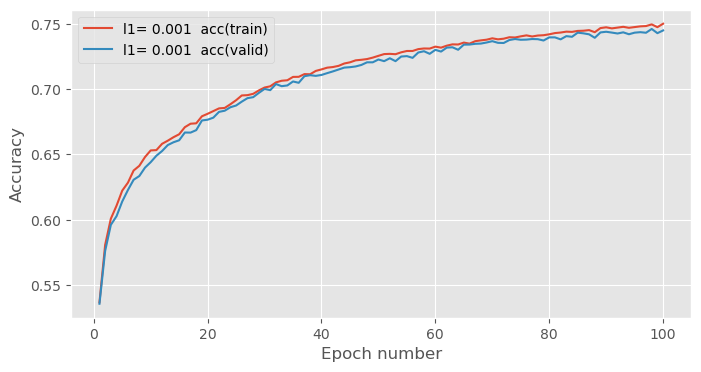

In [18]:
# L1 Penalty accuracy

fig_l1_acc = plt.figure(figsize=(8, 4))
ax_l1_acc = fig_l1_acc.add_subplot(111)
for i in np.arange(len(l1_stats_list)):
    for k in ['acc(train)', 'acc(valid)']:
        ax_l1_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      l1_stats_list[i][1:, l1_keys_list[i][k]], label="l1= " + str(l1_coef_list[i]) + '  '+ k) 

ax_l1_acc.legend(loc=0)
ax_l1_acc.set_xlabel('Epoch number')
ax_l1_acc.set_ylabel('Accuracy')

plt.show()

# L2 Penalty

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 10.4s to complete
    error(train)=1.36e+00, acc(train)=6.25e-01, error(valid)=1.36e+00, acc(valid)=6.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.6s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.4s to complete
    error(train)=9.89e-01, acc(train)=7.17e-01, error(valid)=9.97e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.9s to complete
    error(train)=8.99e-01, acc(train)=7.39e-01, error(valid)=9.10e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.6s to complete
    error(train)=8.36e-01, acc(train)=7.55e-01, error(valid)=8.48e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 9.3s to complete
    error(train)=7.80e-01, acc(train)=7.68e-01, error(valid)=7.93e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.3s to complete
    error(train)=7.36e-01, acc(train)=7.81e-01, error(valid)=7.50e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.2s to complete
    error(train)=7.04e-01, acc(train)=7.89e-01, error(valid)=7.21e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.2s to complete
    error(train)=6.77e-01, acc(train)=7.94e-01, error(valid)=6.95e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 12.0s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.79e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.0s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.53e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.4s to complete
    error(train)=6.20e-01, acc(train)=8.08e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.4s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.28e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.2s to complete
    error(train)=5.89e-01, acc(train)=8.17e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.3s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.2s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.6s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.4s to complete
    error(train)=5.45e-01, acc(train)=8.30e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.6s to complete
    error(train)=5.34e-01, acc(train)=8.32e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.2s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.2s to complete
    error(train)=5.23e-01, acc(train)=8.35e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.2s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.0s to complete
    error(train)=5.08e-01, acc(train)=8.38e-01, error(valid)=5.48e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.2s to complete
    error(train)=4.97e-01, acc(train)=8.43e-01, error(valid)=5.40e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.0s to complete
    error(train)=4.90e-01, acc(train)=8.44e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.1s to complete
    error(train)=4.89e-01, acc(train)=8.43e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.0s to complete
    error(train)=4.84e-01, acc(train)=8.46e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.0s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.7s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.5s to complete
    error(train)=4.69e-01, acc(train)=8.49e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.3s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.3s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.8s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.3s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.7s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.1s to complete
    error(train)=4.48e-01, acc(train)=8.55e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.6s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.5s to complete
    error(train)=4.44e-01, acc(train)=8.56e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.0s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.8s to complete
    error(train)=4.36e-01, acc(train)=8.58e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.3s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.4s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.6s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 15.4s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.1s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.0s to complete
    error(train)=4.17e-01, acc(train)=8.64e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.1s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.6s to complete
    error(train)=4.12e-01, acc(train)=8.65e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.2s to complete
    error(train)=4.12e-01, acc(train)=8.66e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.6s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.5s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.3s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.9s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.7s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.2s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.9s to complete
    error(train)=3.99e-01, acc(train)=8.69e-01, error(valid)=4.71e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.9s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.0s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.4s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.9s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.4s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.2s to complete
    error(train)=3.93e-01, acc(train)=8.71e-01, error(valid)=4.67e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.8s to complete
    error(train)=3.90e-01, acc(train)=8.72e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.9s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=4.64e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.0s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.8s to complete
    error(train)=3.86e-01, acc(train)=8.73e-01, error(valid)=4.63e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.4s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.9s to complete
    error(train)=3.82e-01, acc(train)=8.74e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.6s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=4.66e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.3s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=4.65e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.2s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.2s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.3s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.2s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=4.63e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.3s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.6s to complete
    error(train)=3.76e-01, acc(train)=8.75e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.4s to complete
    error(train)=3.77e-01, acc(train)=8.76e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.1s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.8s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.2s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.5s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=4.55e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.4s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.2s to complete
    error(train)=3.68e-01, acc(train)=8.78e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.2s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.7s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.2s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.54e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.2s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.3s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.4s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=4.53e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.7s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.3s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.5s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=4.52e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.4s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.8s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.0s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=4.53e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.4s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.8s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.0s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.1s to complete
    error(train)=3.55e-01, acc(train)=8.82e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.0s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


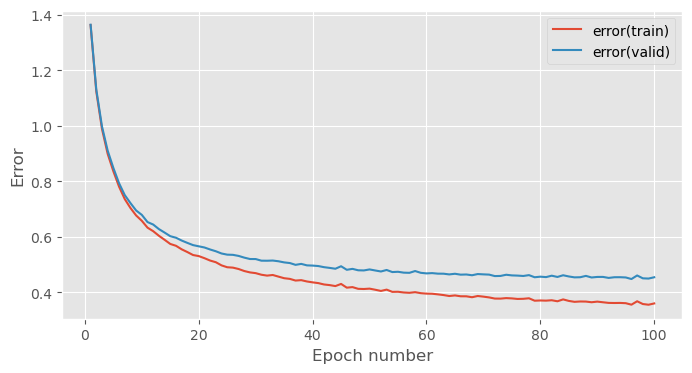

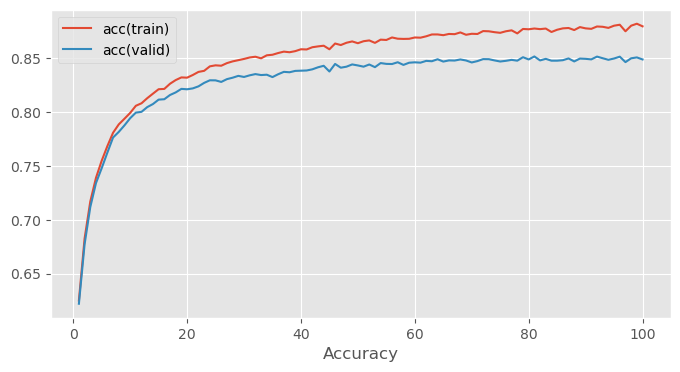

In [19]:
# Three hidden layers for L2 Penalty

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

# set up hyperparameters
num_epochs = 100
stats_interval = 1
l2_coef_list = [10**(-3)]
input_dim, output_dim, hidden_dim = 784, 47, 128
l2_stats_list = []
l2_keys_list = []

for l2_coef in l2_coef_list:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_coef),biases_penalty = L2Penalty(l2_coef)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_coef),biases_penalty = L2Penalty(l2_coef)), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_coef),biases_penalty = L2Penalty(l2_coef)), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(l2_coef),biases_penalty = L2Penalty(l2_coef))
    ])

    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule(learning_rate=1e-4)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    l2_stats_list.append(stats)
    l2_keys_list .append(keys)

In [40]:
# Table 3 L2 Penalty

# val. acc.
val_acc_l2_2 = l2_stats_list[0][1:, l2_keys_list[0]['acc(valid)']][-1]

# training error
error_train_l2_1 = l2_stats_list[0][1:, l2_keys_list[0]['error(train)']][-1]

# validation error
error_valid_l2_1 = l2_stats_list[0][1:, l2_keys_list[0]['error(valid)']][-1]

# generalization gap
generalization_gap_l2_2 = l2_stats_list[0][1:, l2_keys_list[0]['error(valid)']][-1] - l2_stats_list[0][1:, l2_keys_list[0]['error(train)']][-1]

In [41]:
print('val_acc_l2_1e-3',val_acc_l2_2)
print('error_train_1e-3',error_train_l2_1)
print('error_valid_1e-3',error_valid_l2_1)
print('generalization_gap_l2_1e-3',generalization_gap_l2_2)

val_acc_l2_1e-3 0.8489873417721522
error_train_1e-3 0.3598353579567943
error_valid_1e-3 0.45411065711117726
generalization_gap_l2_1e-3 0.09427529915438299


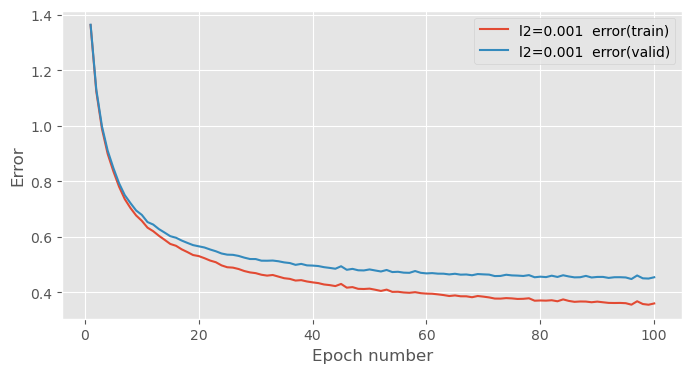

In [22]:
# L2 Penalty error

fig_l2_err = plt.figure(figsize=(8, 4))
ax_l2_err = fig_l2_err.add_subplot(111)
for i in np.arange(len(l2_stats_list)):
    for k in ['error(train)', 'error(valid)']:
        ax_l2_err.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      l2_stats_list[i][1:, l2_keys_list[i][k]], label="l2=" + str(l2_coef_list[i]) + '  '+ k) 
        
ax_l2_err.legend(loc=0)
ax_l2_err.set_xlabel('Epoch number')
ax_l2_err.set_ylabel('Error')

plt.show()

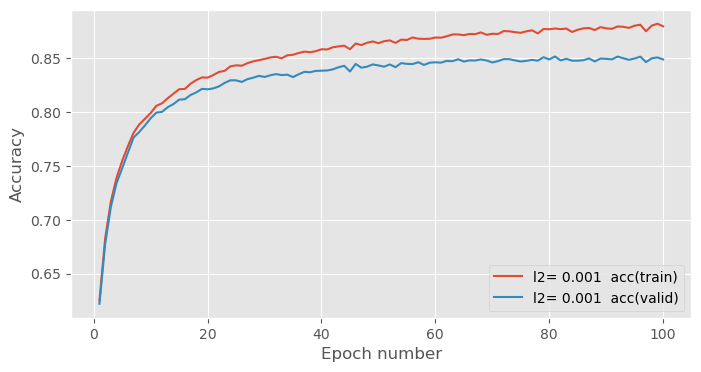

In [23]:
# L2 Penalty accuracy

fig_l2_acc = plt.figure(figsize=(8, 4))
ax_l2_acc = fig_l2_acc.add_subplot(111)
for i in np.arange(len(l2_stats_list)):
    for k in ['acc(train)', 'acc(valid)']:
        ax_l2_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      l2_stats_list[i][1:, l2_keys_list[i][k]], label="l2= " + str(l2_coef_list[i]) + '  '+ k)
        
ax_l2_acc.legend(loc=0)
ax_l2_acc.set_xlabel('Epoch number')
ax_l2_acc.set_ylabel('Accuracy')

plt.show()

# Figure 4

In [7]:
# Dropout results

val_acc_dropout_1,val_acc_dropout_3, val_acc_dropout_4 = 0.807, 0.851, 0.854
prob_list = [0.6, 0.7, 0.85, 0.97]

generalization_gap_dropout_1 = 0.593 - 0.549
generalization_gap_dropout_3 = 0.434 - 0.329
generalization_gap_dropout_4 = 0.457 - 0.244

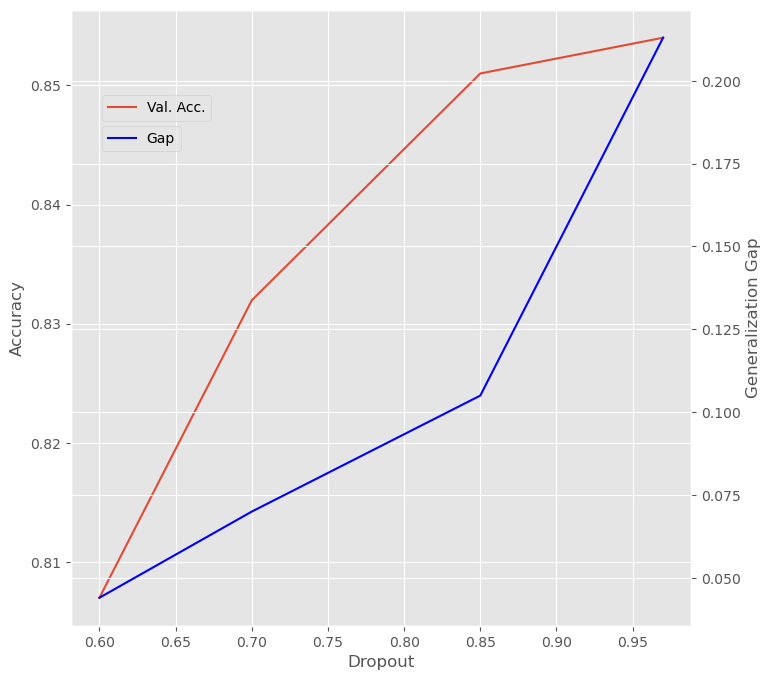

In [8]:
# Figure 4a

figure_4a = plt.figure(figsize = (8,8))
ax_fig_4a = figure_4a.add_subplot(111)

ax_fig_4a.plot(prob_list,[val_acc_dropout_1,val_acc_dropout_2,val_acc_dropout_3, val_acc_dropout_4],label = 'Val. Acc.')
ax_fig_4a_twin = ax_fig_4a.twinx()
ax_fig_4a_twin.plot(prob_list,[generalization_gap_dropout_1,0.07,generalization_gap_dropout_3, generalization_gap_dropout_4],color = 'blue',label = 'Gap')
ax_fig_4a.set_xlabel('Dropout')
ax_fig_4a.set_ylabel('Accuracy')
ax_fig_4a_twin.set_ylabel('Generalization Gap')

ax_fig_4a.legend(loc=(0.05,0.82))
ax_fig_4a_twin.legend(loc=(0.05,0.77))

figure_4a.savefig('Figure_4_a.png')

In [67]:
# L1 and L2 results
l2_coefs = [0.0005, 0.001, 0.005, 0.05]

val_acc_l1_1,val_acc_l1_3, val_acc_l1_4 = 0.795, 0.0241, 0.0220
val_acc_l2_1,val_acc_l2_3, val_acc_l2_4 = 0.851, 0.813, 0.392

generalization_gap_l1_1 = 0.658 - 0.642
generalization_gap_l1_3 = 3.850 - 3.850
generalization_gap_l1_4 = 3.850 - 3.850

generalization_gap_l2_1 = 0.460 - 0.306
generalization_gap_l2_3 = 0.607 - 0.586
generalization_gap_l2_4 = 2.256 - 2.258

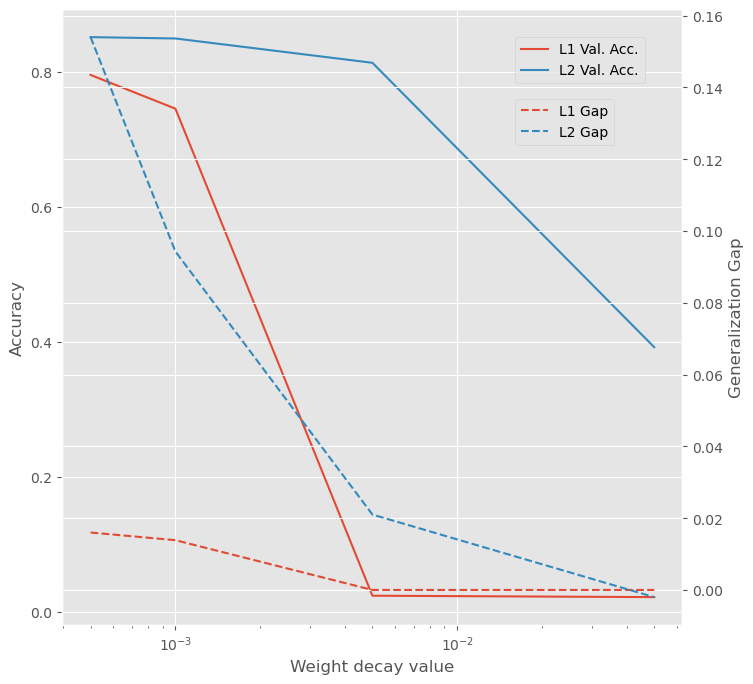

In [74]:
# Figure 4b

figure_4b = plt.figure(figsize = (8,8))
ax_fig_4b = figure_4b.add_subplot(111)

ax_fig_4b.plot(l2_coefs,[val_acc_l1_1,val_acc_l1_2,val_acc_l1_3, val_acc_l1_4],label = 'L1 Val. Acc.')
ax_fig_4b.plot(l2_coefs,[val_acc_l2_1,val_acc_l2_2,val_acc_l2_3, val_acc_l2_4],label = 'L2 Val. Acc.')
ax_fig_4b_twin = ax_fig_4b.twinx()
ax_fig_4b_twin.plot(l2_coefs,[generalization_gap_l1_1,generalization_gap_l1_2,generalization_gap_l1_3, generalization_gap_l1_4], linestyle='--', label = 'L1 Gap')
ax_fig_4b_twin.plot(l2_coefs,[generalization_gap_l2_1,generalization_gap_l2_2,generalization_gap_l2_3, generalization_gap_l2_4],linestyle = '--',label = 'L2 Gap')
ax_fig_4b.set_xlabel('Weight decay value')
ax_fig_4b.set_ylabel('Accuracy')
ax_fig_4b_twin.set_ylabel('Generalization Gap')

ax_fig_4b.legend(loc=(0.73,0.88))
ax_fig_4b_twin.legend(loc=(0.73,0.78))
ax_fig_4b.set_xscale('log')

figure_4b.savefig('Figure_4_b.png')

# Experiment on test set

In [9]:
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/Users/cristihiropedi/mlp_cw1/data/emnist-test.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 11.6s to complete
    error(train)=1.42e+00, acc(train)=6.11e-01, error(valid)=1.45e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.3s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.19e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 11.1s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.05e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.7s to complete
    error(train)=8.98e-01, acc(train)=7.38e-01, error(valid)=9.39e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.6s to complete
    error(train)=8.29e-01, acc(train)=7.55e-01, error(valid)=8.77e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.2s to complete
    error(train)=7.74e-01, acc(train)=7.68e-01, error(valid)=8.22e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.6s to complete
    error(train)=7.24e-01, acc(train)=7.81e-01, error(valid)=7.78e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.8s to complete
    error(train)=6.90e-01, acc(train)=7.89e-01, error(valid)=7.46e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.9s to complete
    error(train)=6.59e-01, acc(train)=7.98e-01, error(valid)=7.19e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.3s to complete
    error(train)=6.29e-01, acc(train)=8.05e-01, error(valid)=6.93e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.0s to complete
    error(train)=6.07e-01, acc(train)=8.11e-01, error(valid)=6.74e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.6s to complete
    error(train)=5.90e-01, acc(train)=8.13e-01, error(valid)=6.59e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.2s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=6.42e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.4s to complete
    error(train)=5.54e-01, acc(train)=8.24e-01, error(valid)=6.28e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.6s to complete
    error(train)=5.39e-01, acc(train)=8.28e-01, error(valid)=6.15e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.6s to complete
    error(train)=5.24e-01, acc(train)=8.33e-01, error(valid)=6.02e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.9s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.92e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.0s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=5.90e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.0s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.80e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.6s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.6s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.68e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.7s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.61e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.2s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.6s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=5.53e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.8s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.9s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.6s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=5.42e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.6s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.6s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.1s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.2s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.24e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.8s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.1s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.6s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.0s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.8s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.13e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.0s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.8s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.4s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.2s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.6s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.01e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.9s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.3s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=4.97e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.3s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.4s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.3s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=4.95e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.5s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.6s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=4.92e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.7s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=4.90e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.1s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.4s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=4.87e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.7s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.6s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.7s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.9s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.4s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.8s to complete
    error(train)=3.18e-01, acc(train)=8.89e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.2s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.5s to complete
    error(train)=3.14e-01, acc(train)=8.90e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.9s to complete
    error(train)=3.11e-01, acc(train)=8.91e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.8s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.1s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.4s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.3s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.3s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.77e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.3s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.6s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.1s to complete
    error(train)=2.94e-01, acc(train)=8.96e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.9s to complete
    error(train)=2.93e-01, acc(train)=8.96e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.4s to complete
    error(train)=2.91e-01, acc(train)=8.96e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.7s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.4s to complete
    error(train)=2.85e-01, acc(train)=8.99e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.4s to complete
    error(train)=2.83e-01, acc(train)=9.00e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.6s to complete
    error(train)=2.83e-01, acc(train)=9.00e-01, error(valid)=4.78e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.6s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=4.75e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.2s to complete
    error(train)=2.78e-01, acc(train)=9.02e-01, error(valid)=4.73e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.3s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.9s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.2s to complete
    error(train)=2.72e-01, acc(train)=9.03e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.4s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=4.79e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.5s to complete
    error(train)=2.69e-01, acc(train)=9.03e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.1s to complete
    error(train)=2.67e-01, acc(train)=9.05e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.3s to complete
    error(train)=2.66e-01, acc(train)=9.05e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.3s to complete
    error(train)=2.65e-01, acc(train)=9.05e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.2s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.4s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.78e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.6s to complete
    error(train)=2.62e-01, acc(train)=9.05e-01, error(valid)=4.78e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.6s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=4.78e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.7s to complete
    error(train)=2.57e-01, acc(train)=9.07e-01, error(valid)=4.77e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.3s to complete
    error(train)=2.57e-01, acc(train)=9.07e-01, error(valid)=4.79e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.2s to complete
    error(train)=2.56e-01, acc(train)=9.07e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.0s to complete
    error(train)=2.53e-01, acc(train)=9.08e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.0s to complete
    error(train)=2.51e-01, acc(train)=9.08e-01, error(valid)=4.77e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.6s to complete
    error(train)=2.51e-01, acc(train)=9.09e-01, error(valid)=4.78e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.4s to complete
    error(train)=2.48e-01, acc(train)=9.10e-01, error(valid)=4.81e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.2s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.2s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=4.78e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.1s to complete
    error(train)=2.47e-01, acc(train)=9.10e-01, error(valid)=4.77e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.2s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=4.79e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.0s to complete
    error(train)=2.42e-01, acc(train)=9.12e-01, error(valid)=4.78e-01, acc(valid)=8.46e-01


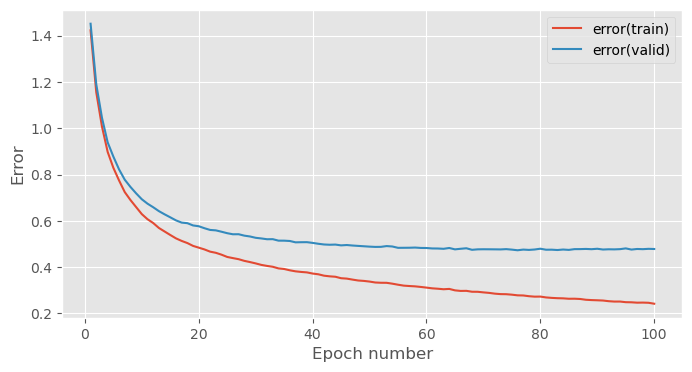

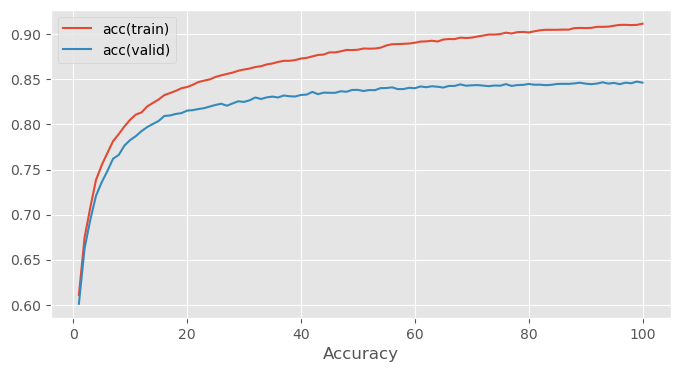

In [10]:
# Three hidden layers using Dropout with inclusion probability 0.97

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# set up hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
incl_prob = 0.97

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng = rng, incl_prob = incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=1e-4)

stats_test, keys_test, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True)

In [11]:
print('accuracy performance on test set is: ',stats_test[1:,keys_test['acc(valid)']][-1])

accuracy performance on test set is:  0.8464556962025315
